# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.58'

## Specifying filetype, and folder as before

In [2]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [3]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong')
batch='Weak' 

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

In [4]:
GroupN_df.to_clipboard(excel=True)

### Now load one file from this group to tweak parameters for

In [5]:
Diad_Files =GroupN_df['filename']
i=5
Diad_Files[i]

'POC52_CRR_DiadFit.txt'

### Lets plot the diad to have a look at it

POC52_CRR_DiadFit.txt


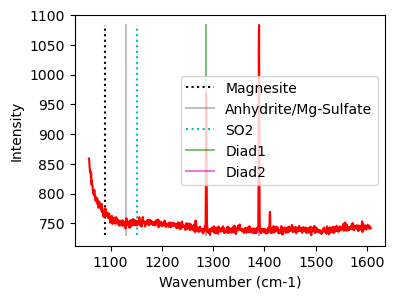

In [6]:
print(GroupN_df['filename'].iloc[i])
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [7]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [8]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1310, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250), upper_bck_diad1=(1310, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=238.96276506784898, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

c:\Users\penny\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(lz1_fraction=0.0) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\penny\anaconda3\lib\site-packages\lmfit\confidence.py:323: UserWarning: maxiter=200 reached and prob(lz1_fraction=0.20100039156119806) = 0.9580253258990455 < max(sigmas)
  warn(errmsg)


                  99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 lz1_amplitude: -11.24941  -7.51321  -3.81744 311.31893  +9.08016 +18.98648 +28.97537
 lz1_center   :  -0.02390  -0.01389  -0.009571286.68983  +0.00958  +0.01391  +0.02393
 lz1_sigma    :  -0.04347  -0.02760  -0.01326   0.59605  +0.00891  +0.01763  +0.03117
 lz1_fraction :      -inf      -inf      -inf   0.00000  +0.09567  +0.19760      +inf
 c1c          :  -0.65653  -0.43450  -0.21499  -0.59320  +0.21302  +0.42710  +0.64329


Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1286.689829       1286.689829          0.0083         311.31893   

   Diad1_Voigt_Sigma Diad1_Voigt_Gamma  Diad1_Combofit_Height  Diad1_Residual  \
0           0.596054              None             244.740736        3.751447   

   Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  
0    3.915612e-07    1.192108  Flagged Warnings:

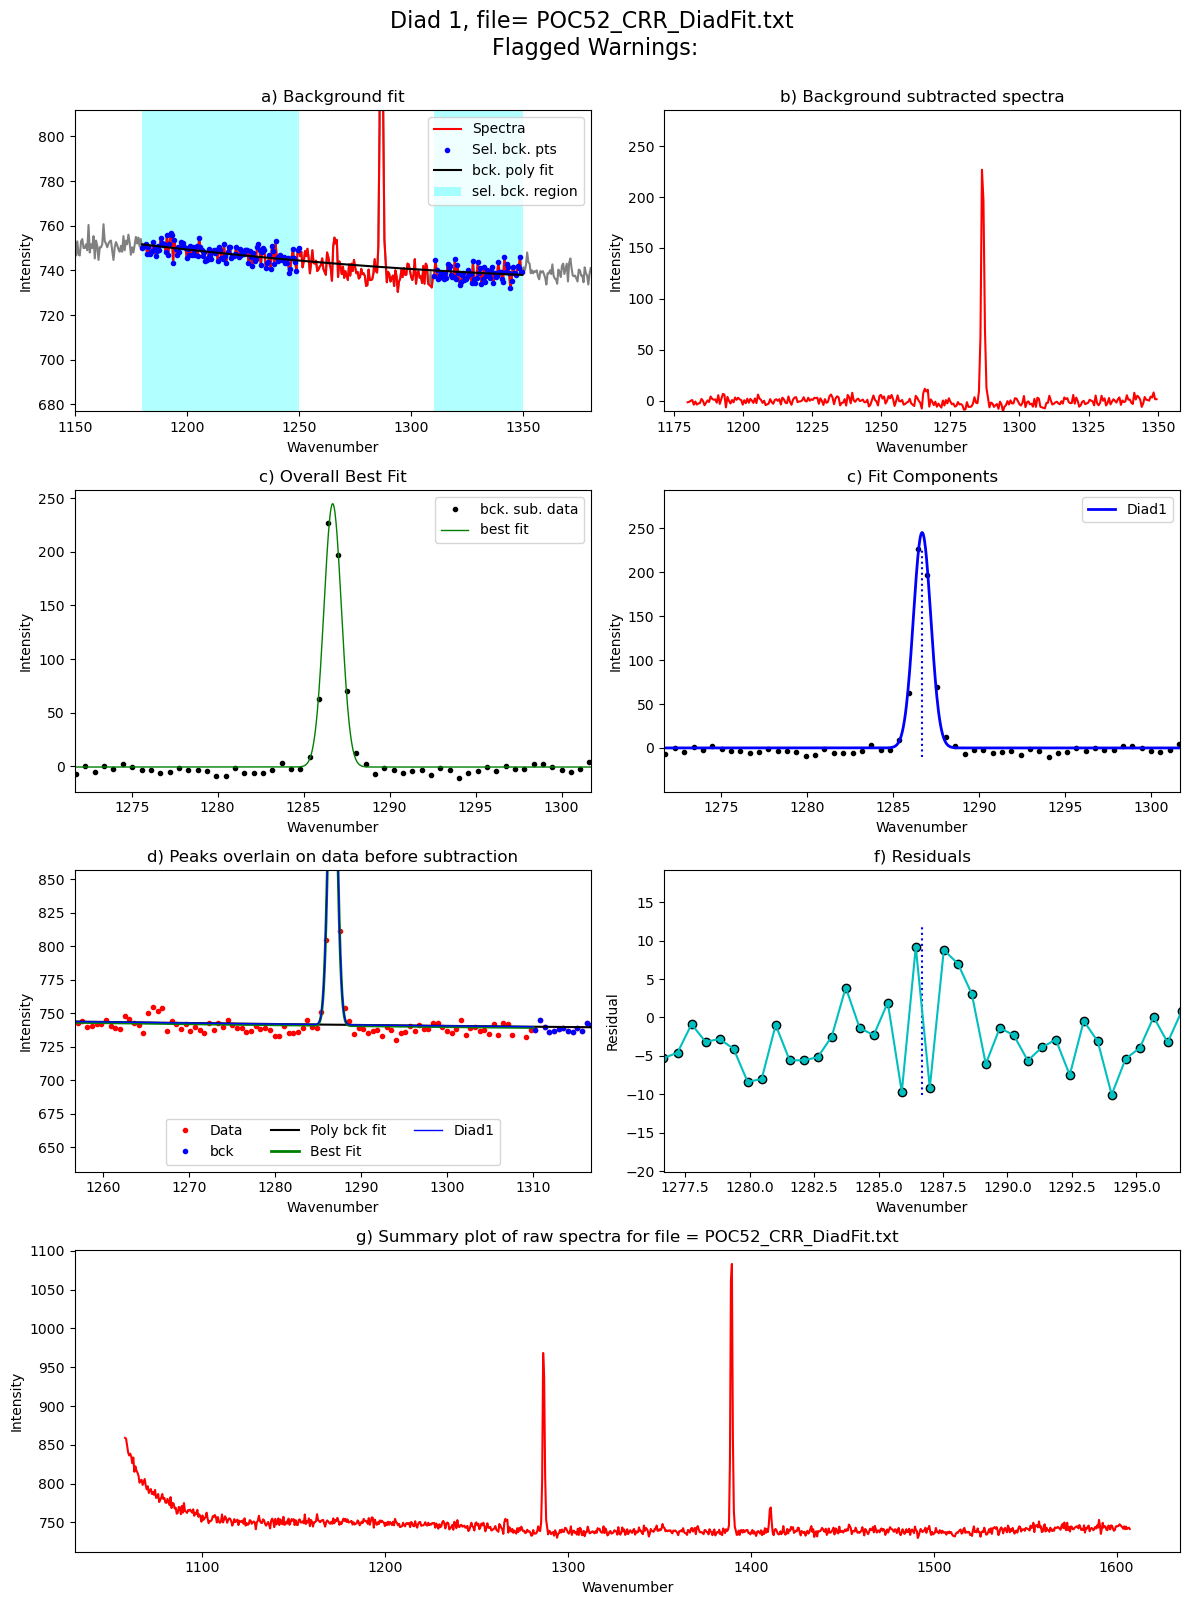

In [9]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i],
filetype=filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [13]:
diad1_fit_config2=diad1_fit_config_init
diad1_fit_config2.diad_sigma=Diad1_fit['Diad1_Voigt_Sigma'][0]

## Fit diad2

In [14]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.6,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, 
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=1,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1360), upper_bck_diad2=(1430, 1480), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=374.5467432116807, HB_prom=31.797263078743413, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False, C13_prom=10)

### See what these fit parameters look like for diad2

In [15]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i], filetype=filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

MinimizerException: Cannot determine Confidence Intervals without sensible uncertainty estimates

### Update the sigma

In [ ]:
diad2_fit_config2=diad2_fit_config_init
diad2_fit_config2.diad_sigma=Diad2_fit['Diad2_Voigt_Sigma'][0]
print(Diad2_fit['Diad2_Voigt_Sigma'][0])

0.5863416785268925


## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/12 [00:00<?, ?it/s]

<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EECCD37280>>
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EECCD09BE0>>


  8%|▊         | 1/12 [00:01<00:20,  1.90s/it]

<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEC54C0640>>
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EECD7DF7C0>>


 17%|█▋        | 2/12 [00:03<00:17,  1.75s/it]

<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EECE29FDC0>>
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EECDCA75E0>>


 25%|██▌       | 3/12 [00:05<00:16,  1.83s/it]

<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EECE016160>>
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EECE01CB80>>


 33%|███▎      | 4/12 [00:07<00:14,  1.83s/it]

<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EECE7676D0>>
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EED6024BB0>>


 42%|████▏     | 5/12 [00:09<00:13,  1.98s/it]

<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EED6346700>>
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EECE76DBB0>>


 50%|█████     | 6/12 [00:11<00:12,  2.01s/it]

<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEDEEB7250>>
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEDEEBC5E0>>


 58%|█████▊    | 7/12 [00:13<00:10,  2.06s/it]

<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEDEEBC5E0>>
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEE2596FA0>>


 67%|██████▋   | 8/12 [00:15<00:08,  2.07s/it]

<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEE9E631F0>>
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEE9E5D550>>


 75%|███████▌  | 9/12 [00:18<00:06,  2.23s/it]

<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEEA352670>>
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEEF21A2B0>>


 83%|████████▎ | 10/12 [00:20<00:04,  2.17s/it]

<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEEF401FD0>>


g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\diads.py:2816: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))


<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEF1633610>>


 92%|█████████▏| 11/12 [00:22<00:02,  2.13s/it]

<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEF19692B0>>
refit attempt 1
Flagged Warnings: HB1_LowSigma HB1_HighAmp
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEF18F26D0>>
refit attempt  =2, Flagged Warnings: HB1_LowSigma HB1_HighAmp
Flagged Warnings: HB1_LowSigma HB1_HighAmp
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEF19785B0>>
refit attempt  =3, Flagged Warnings: HB1_LowSigma HB1_HighAmp
Flagged Warnings: HB1_LowSigma HB1_HighAmp
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEE9E6C580>>
refit attempt  =4, Flagged Warnings: HB1_LowSigma HB1_HighAmp
Flagged Warnings: HB1_LowSigma HB1_HighAmp
<bound method ModelResult.ci_report of <lmfit.model.ModelResult object at 0x000001EEF19122E0>>
refit attempt  =5, Flagged Warnings: HB1_LowSigma HB1_HighAmp
Flagged Warnings: HB1_LowSigma HB1_HighAmp
<bound method ModelResult.ci_report of <lmfit.

100%|██████████| 12/12 [00:25<00:00,  2.16s/it]


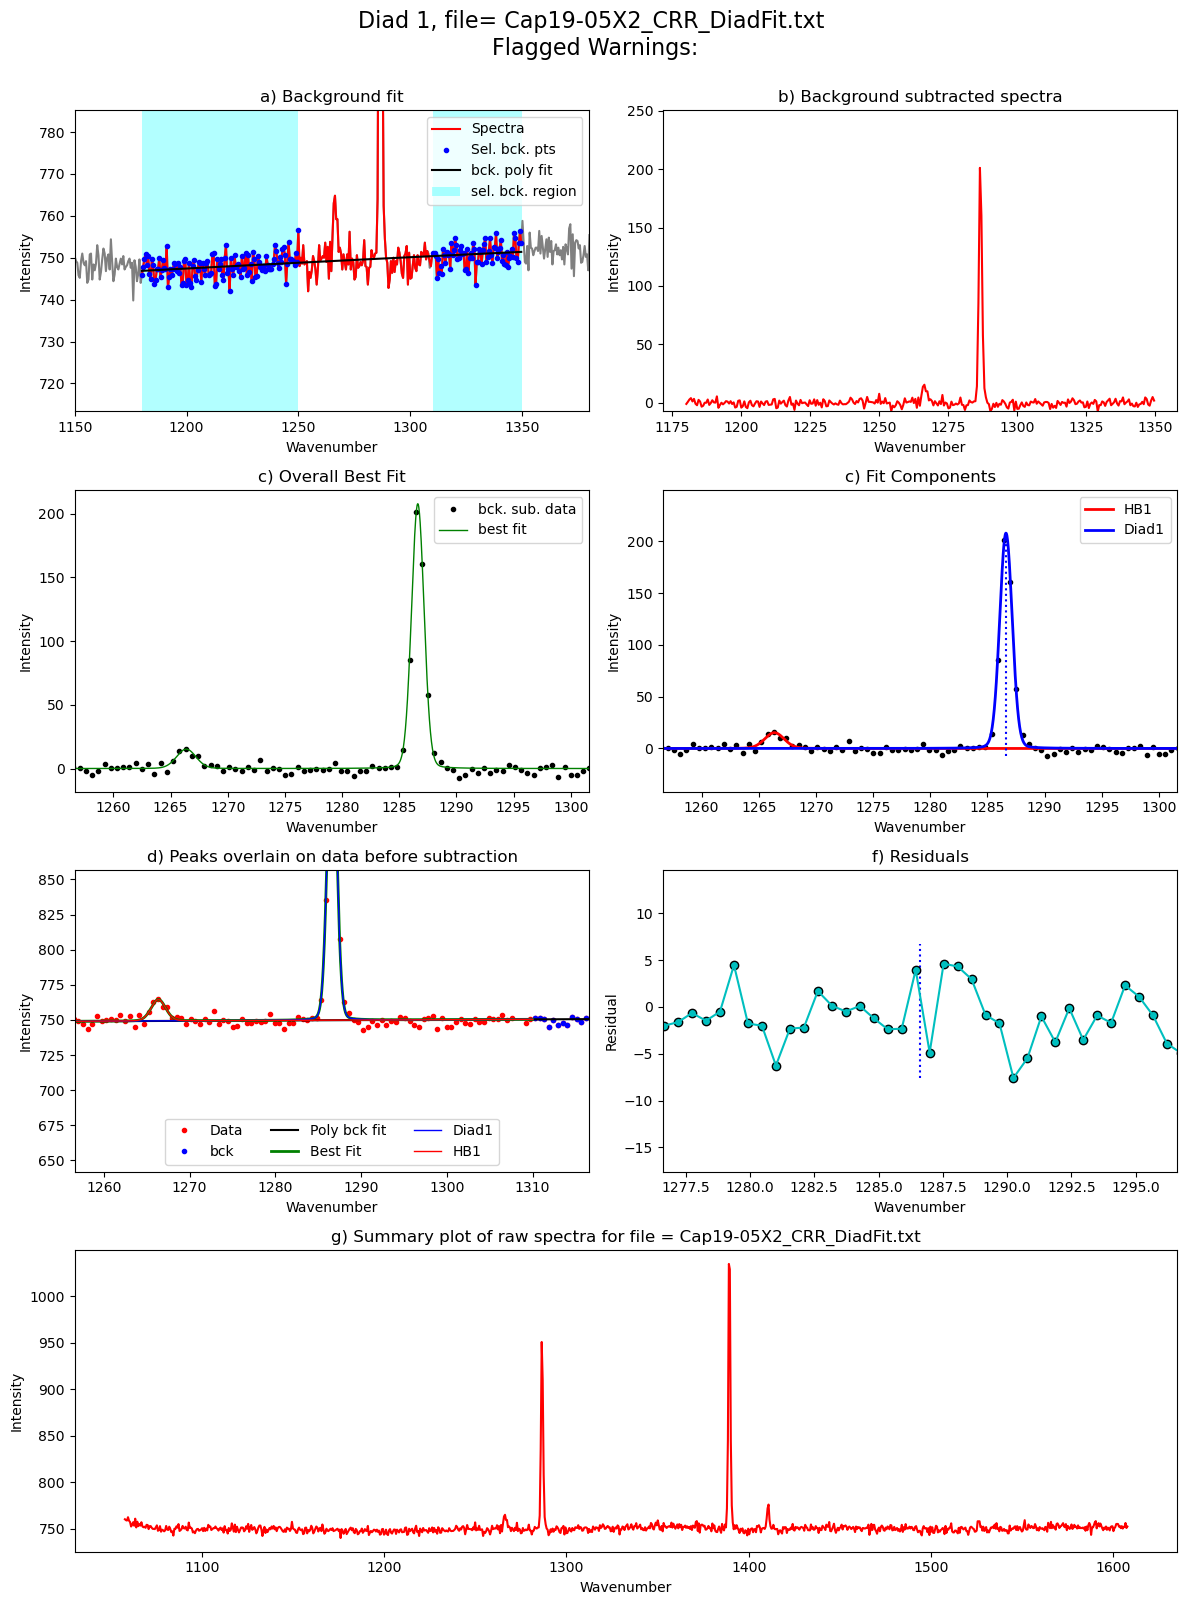

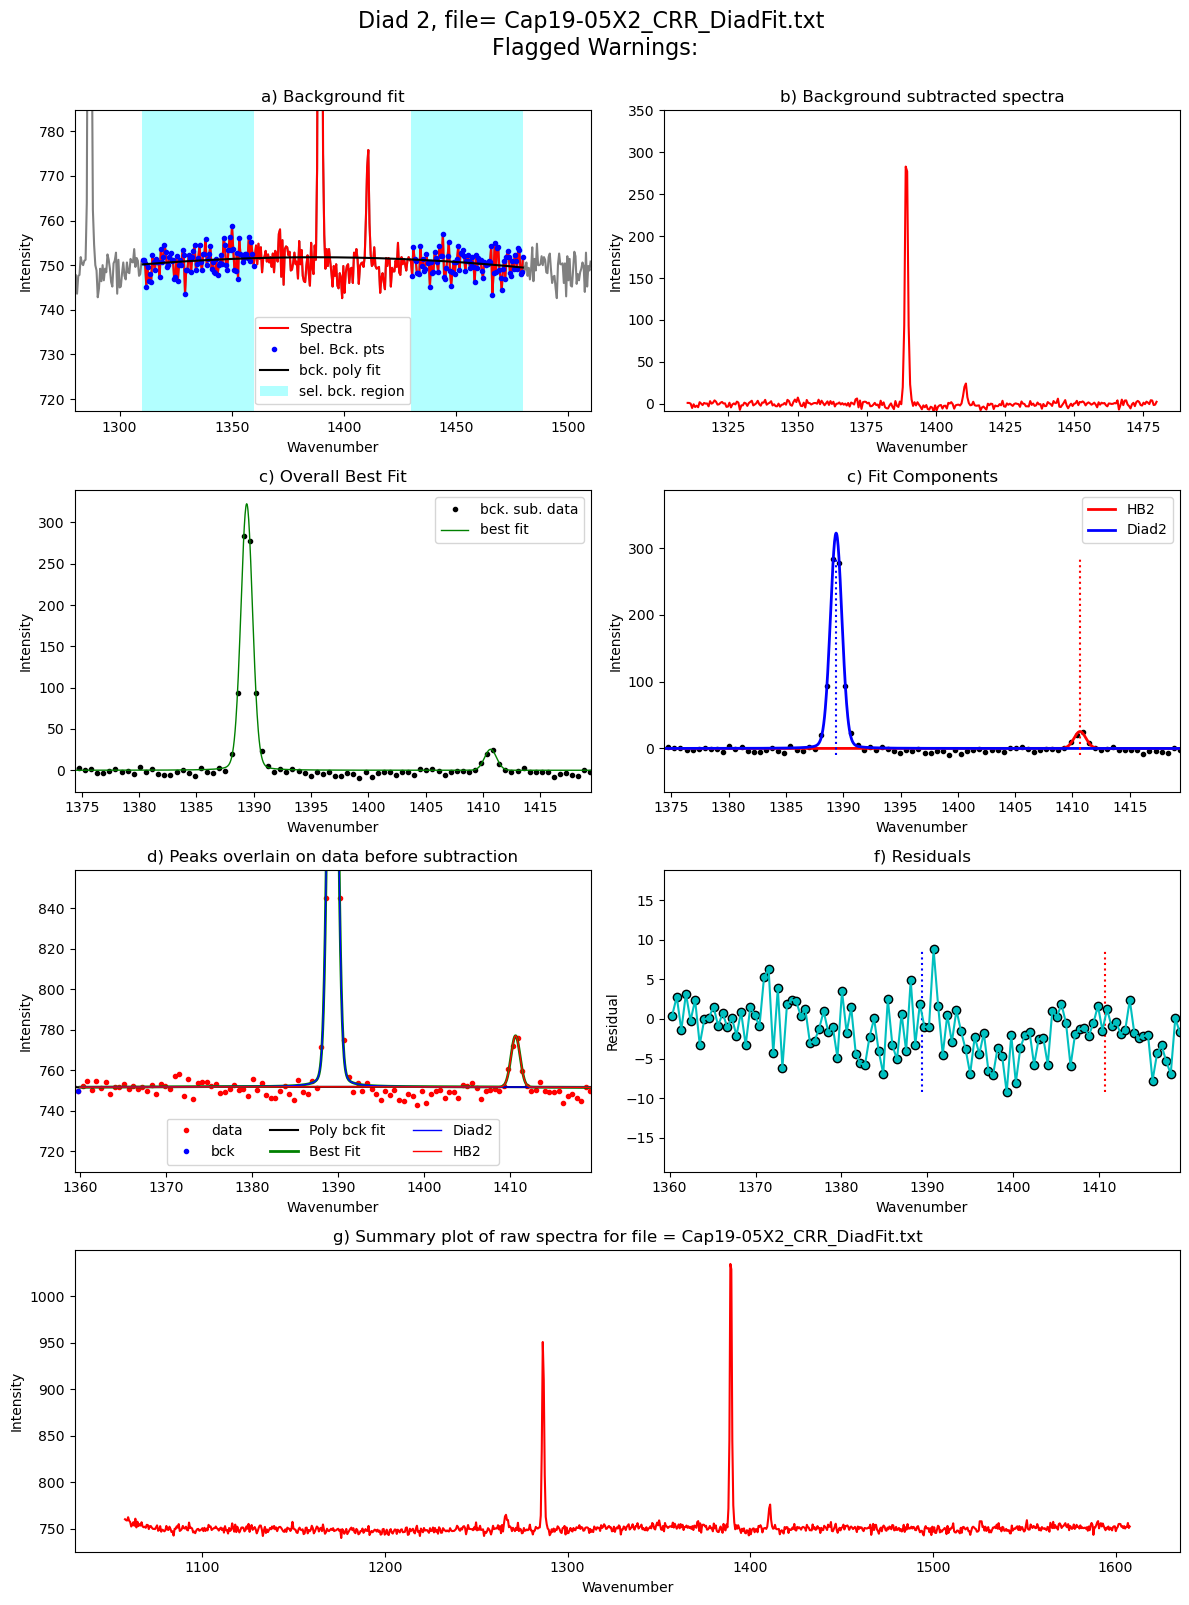

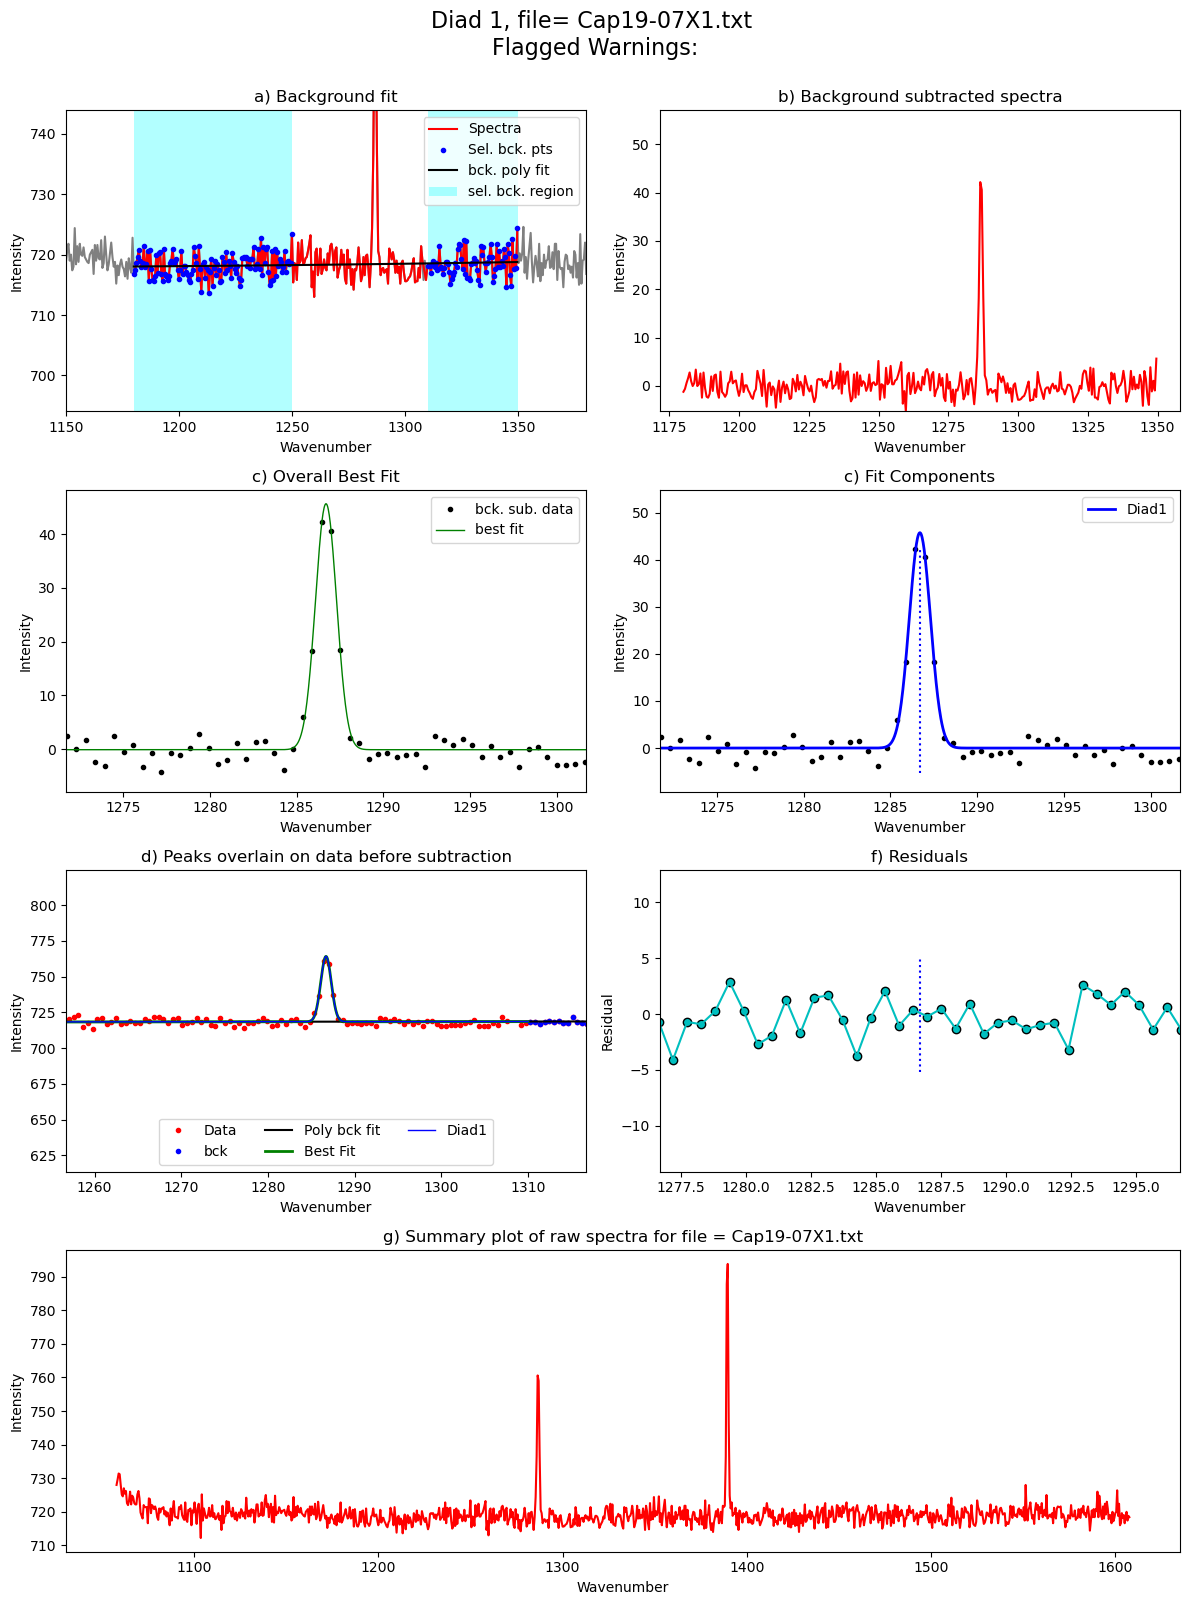

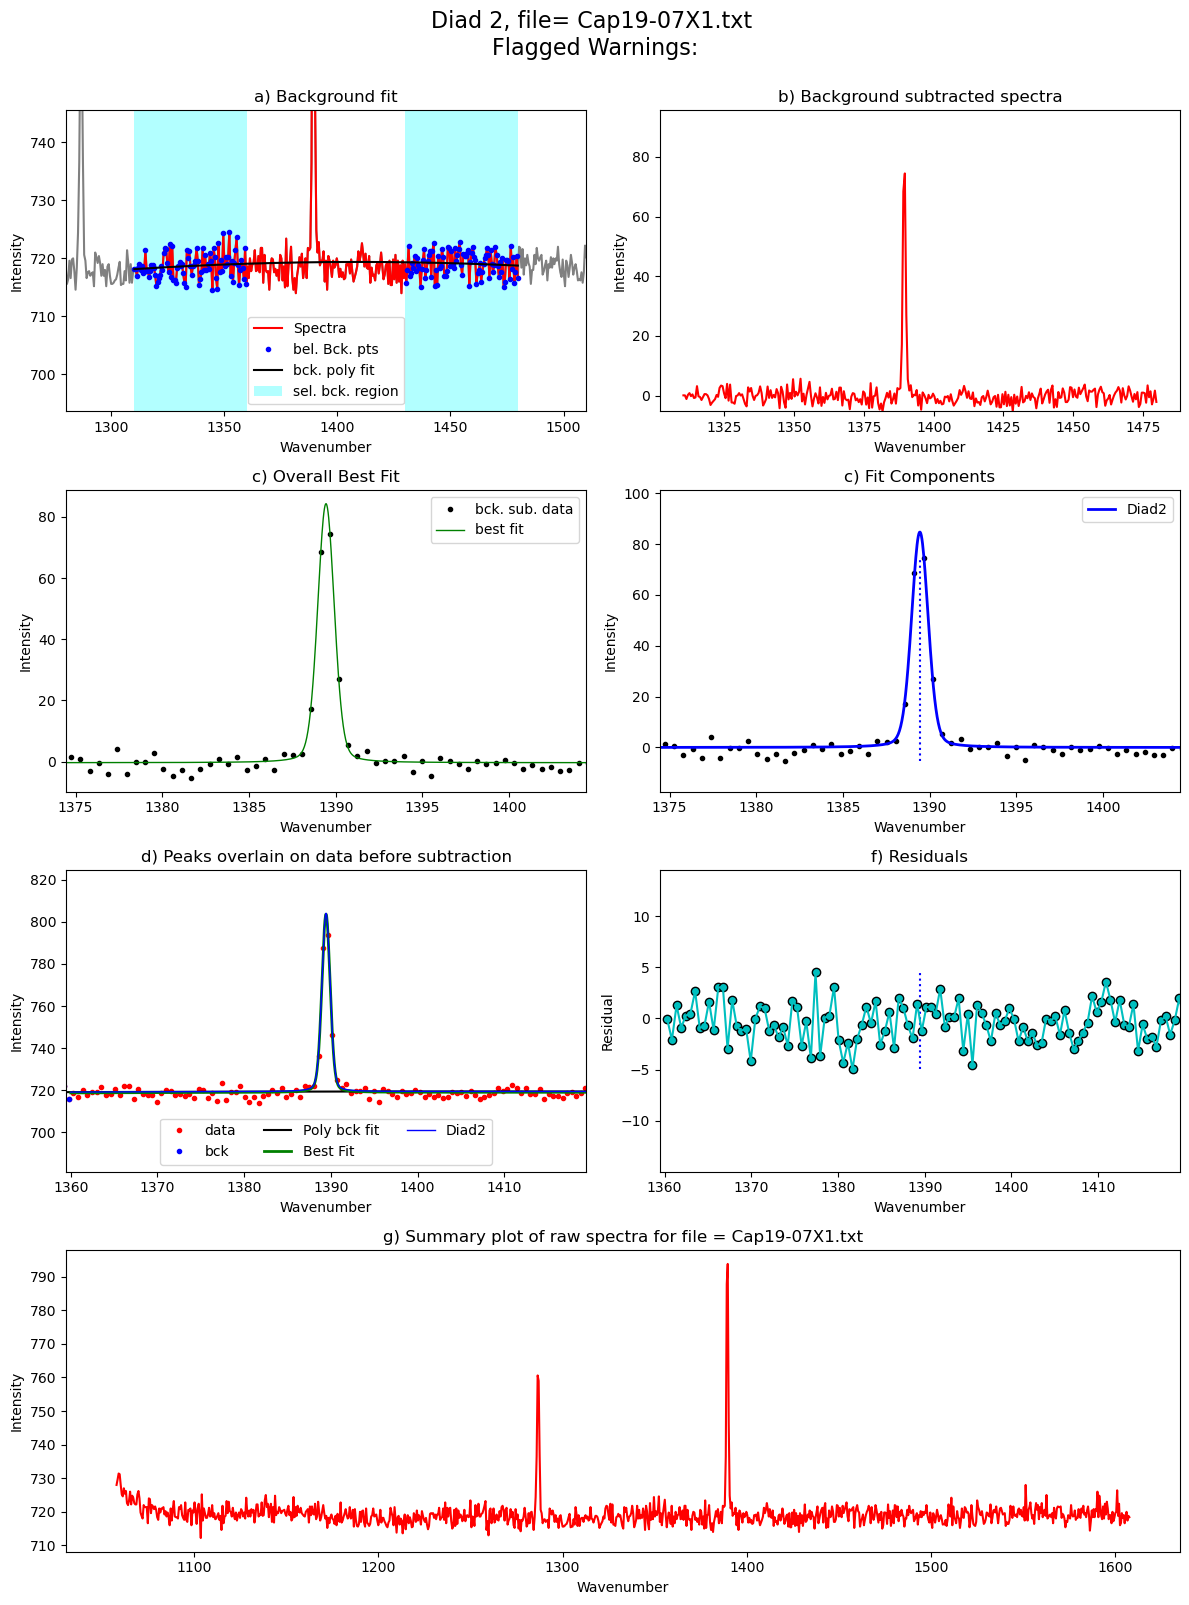

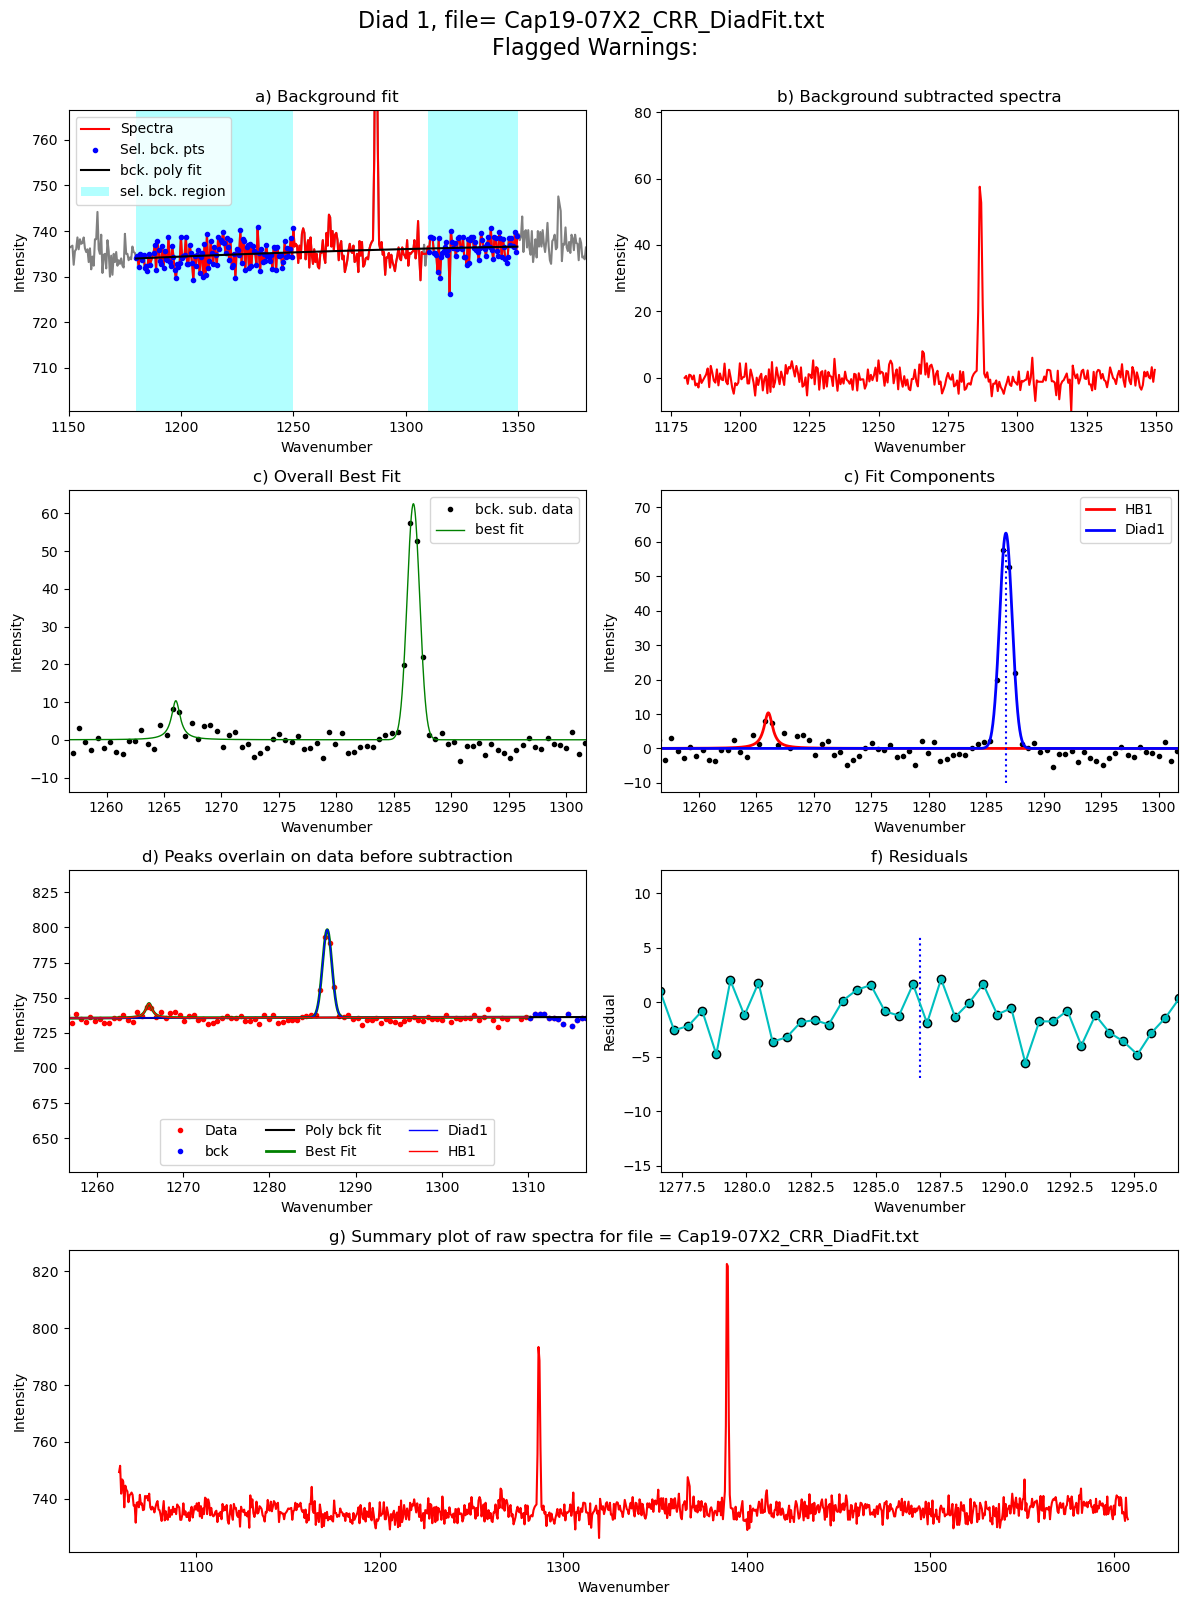

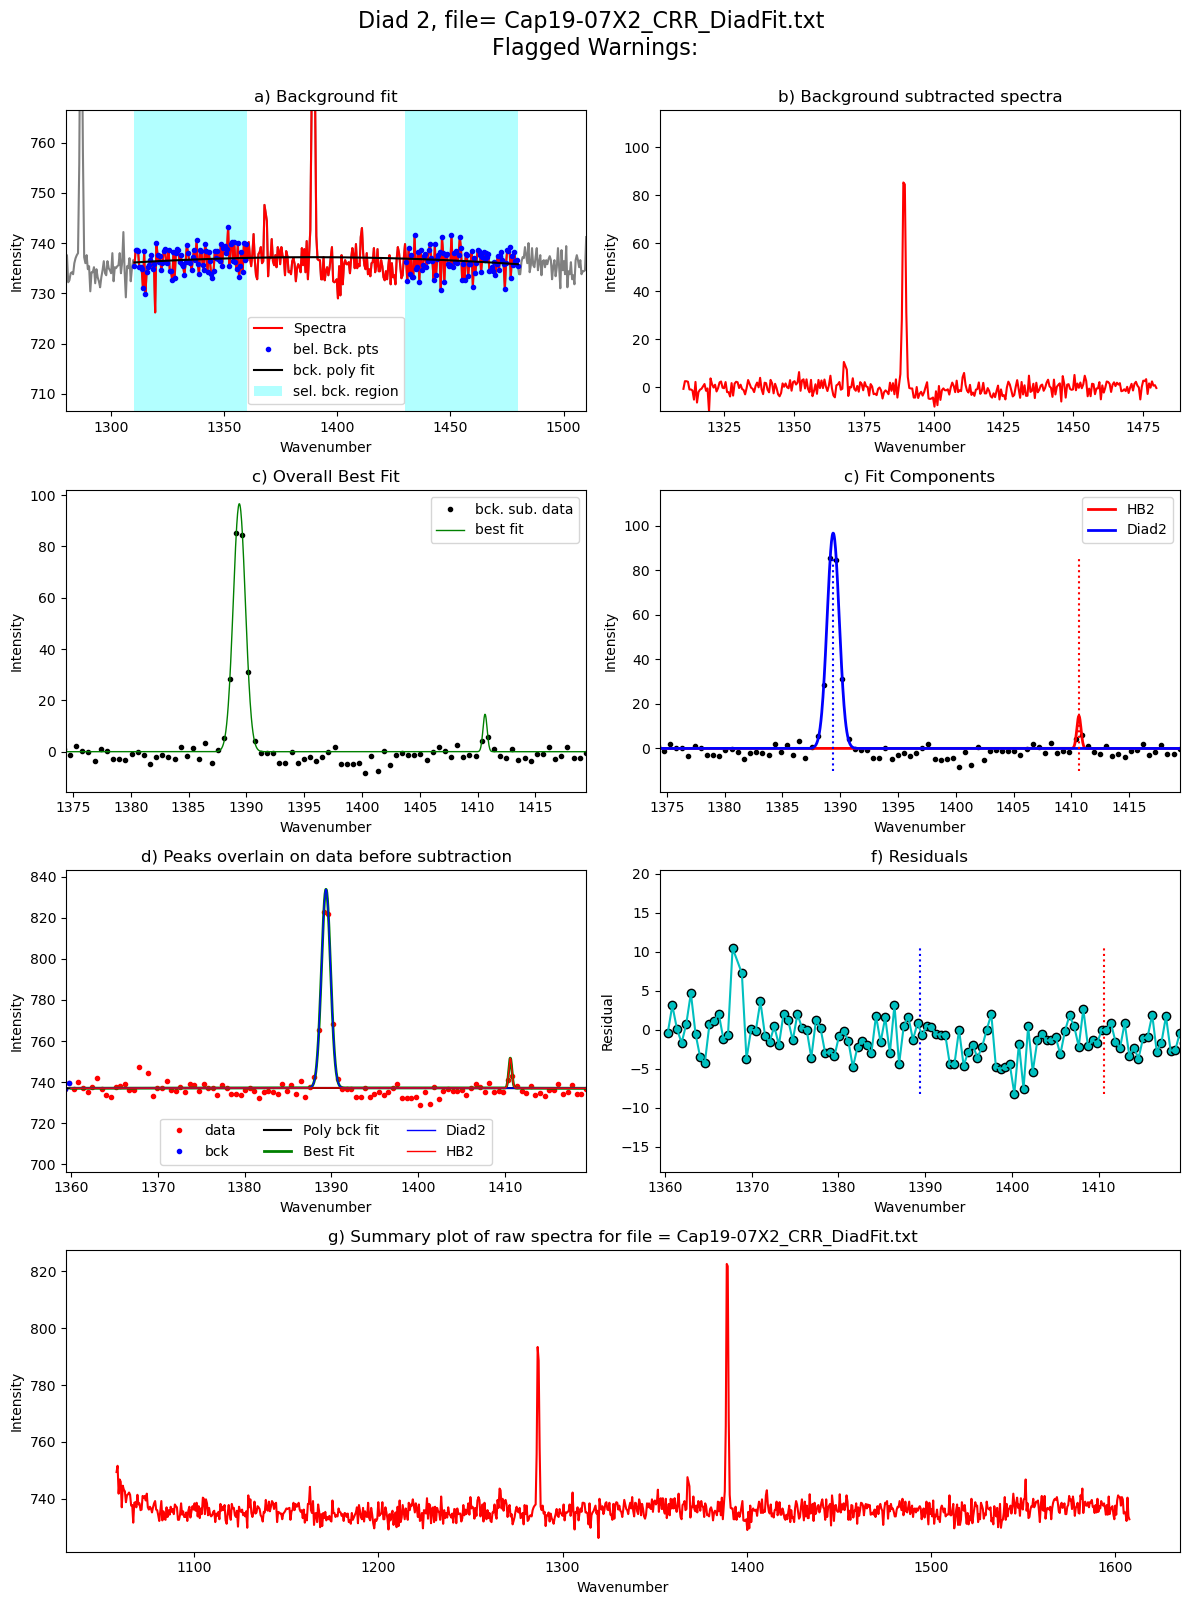

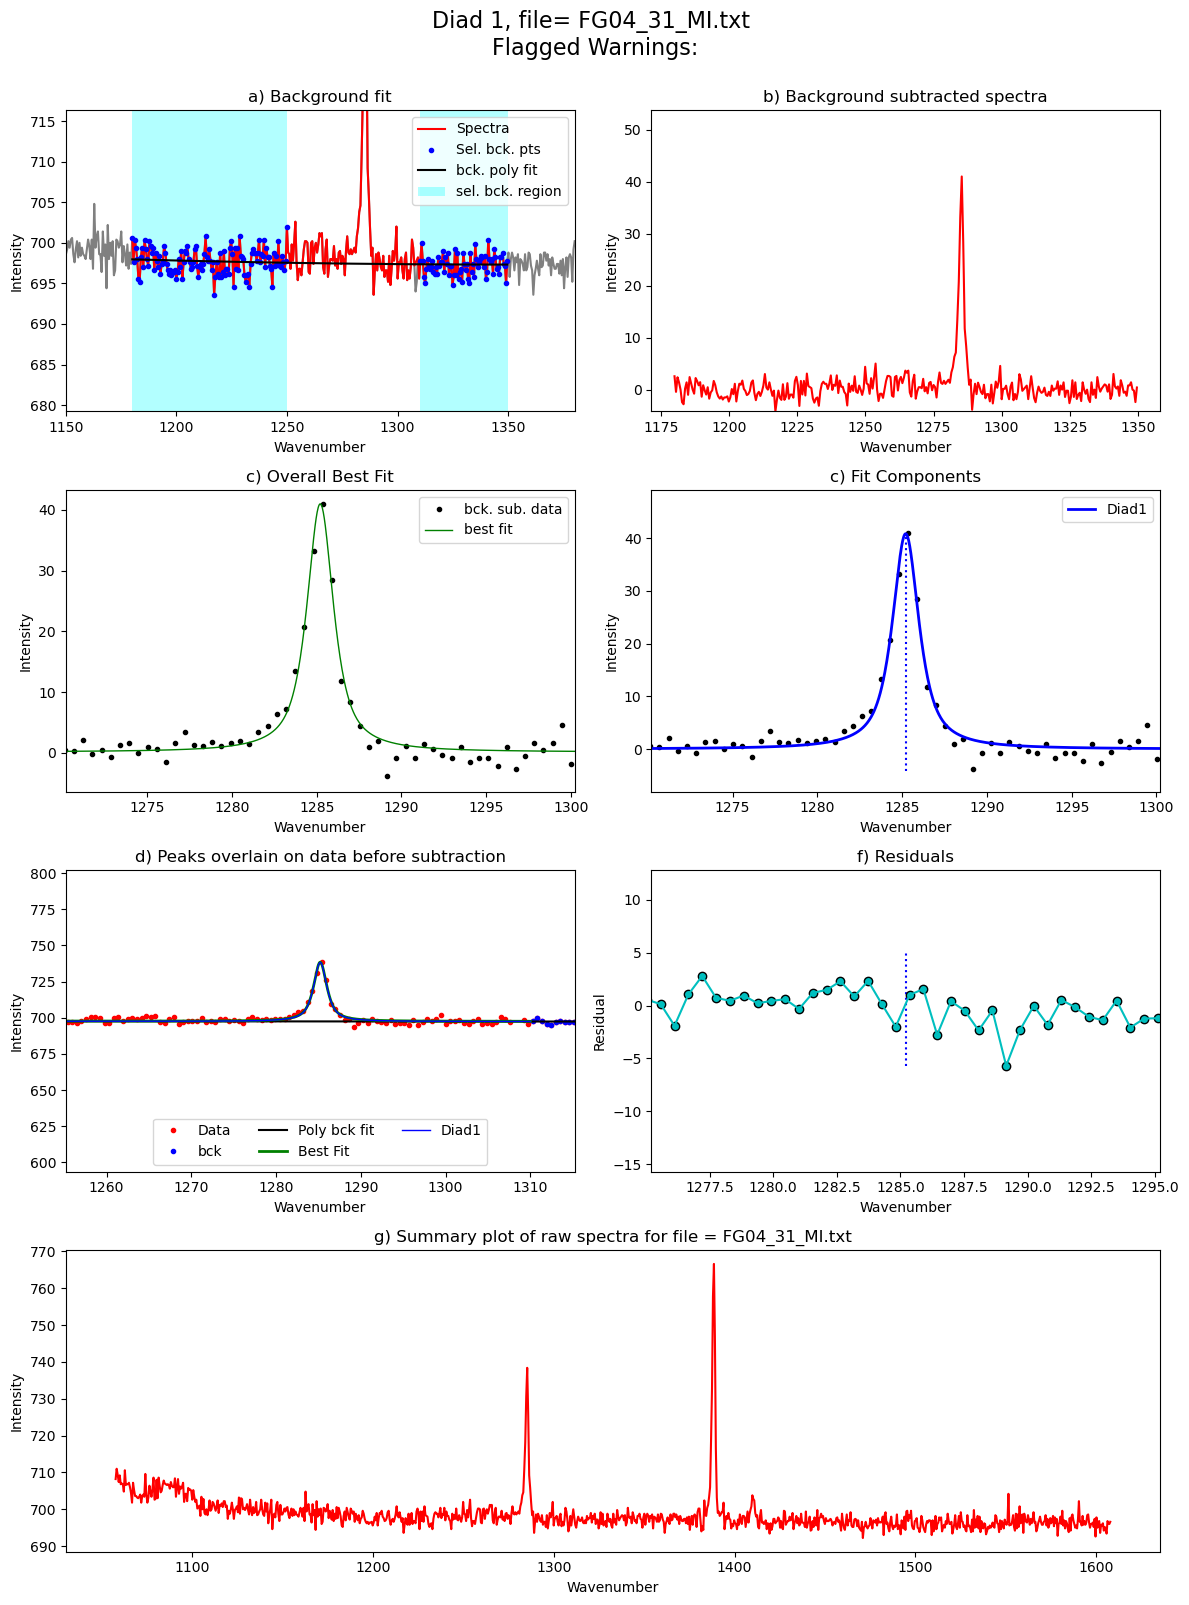

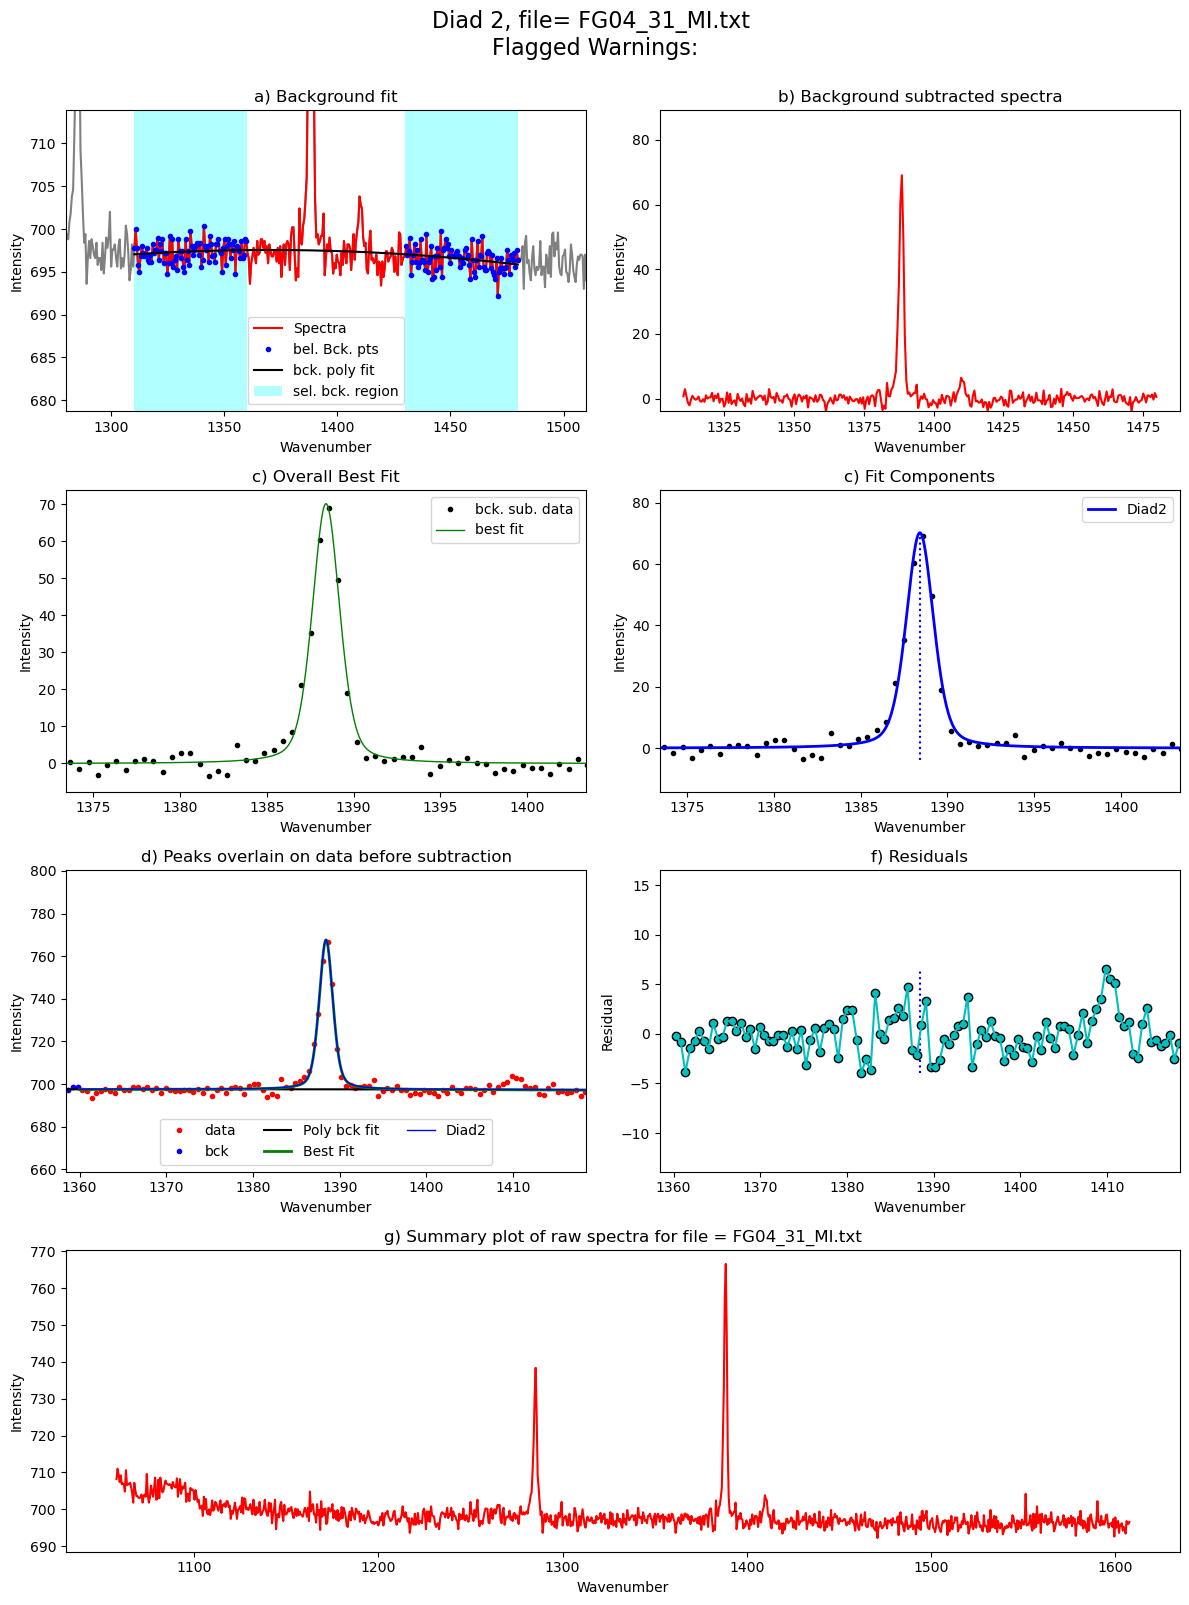

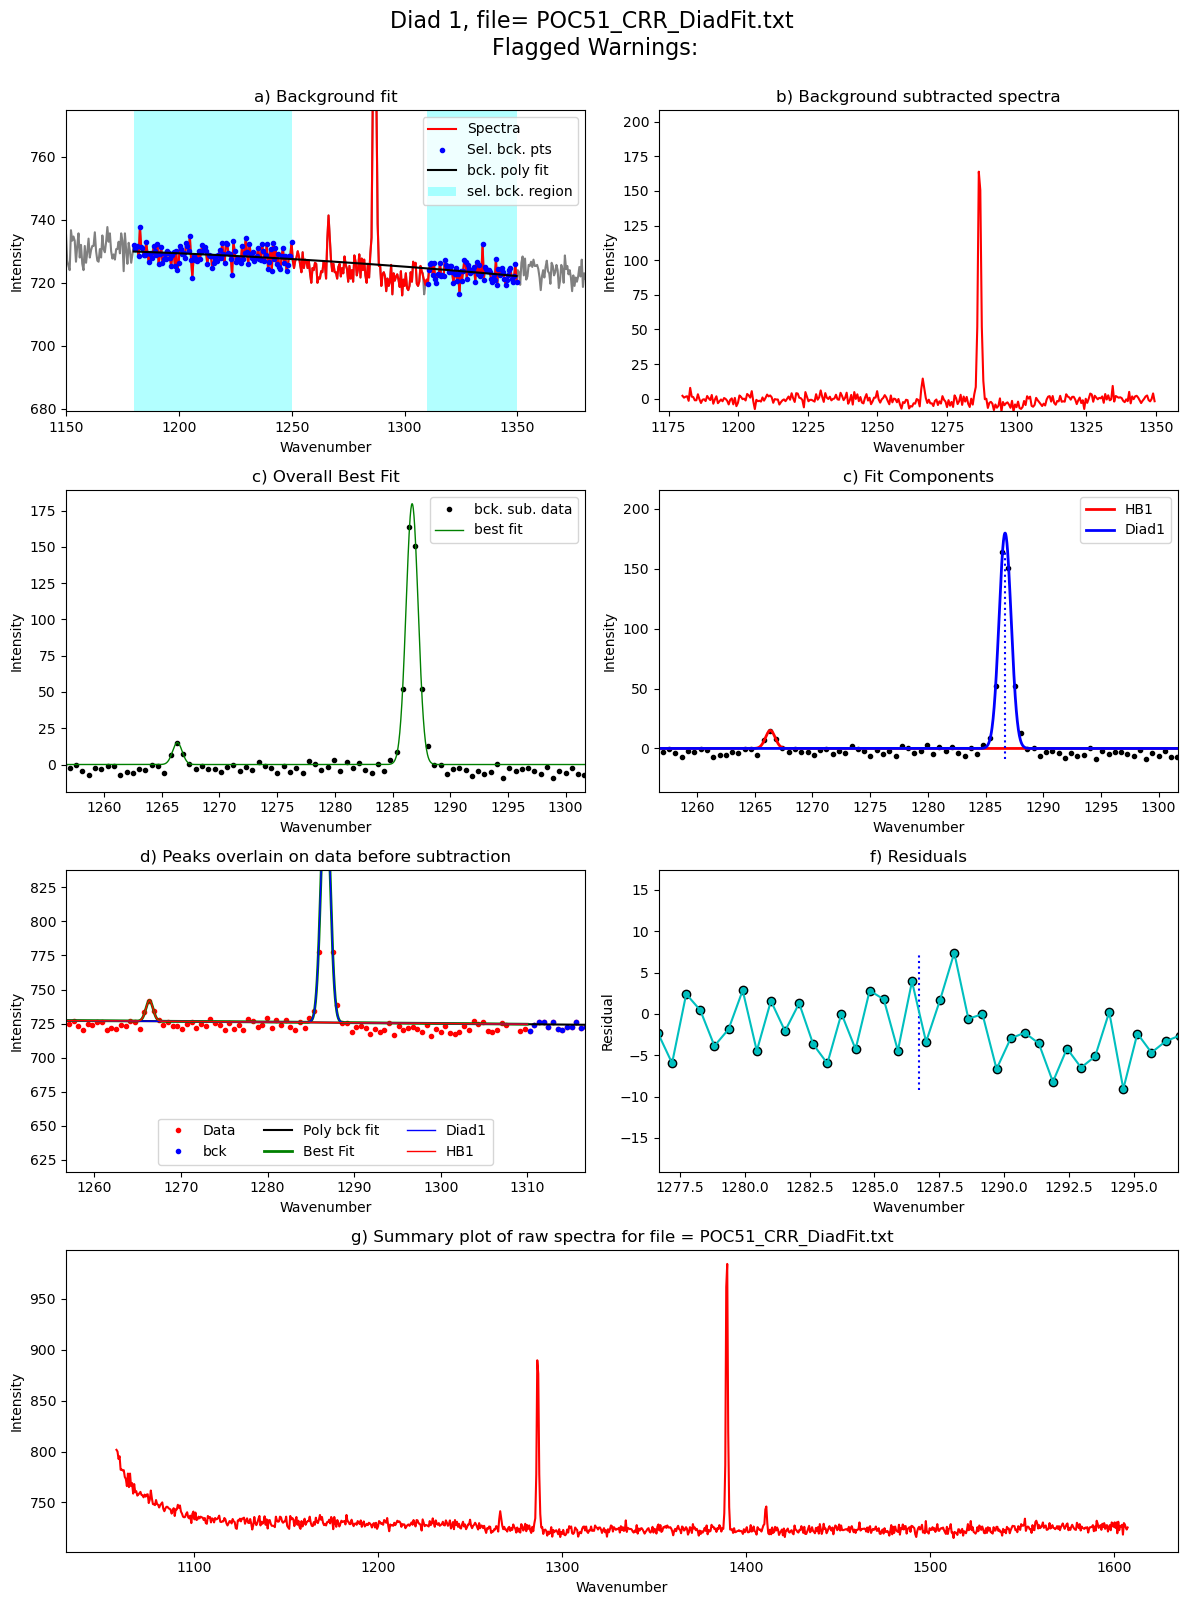

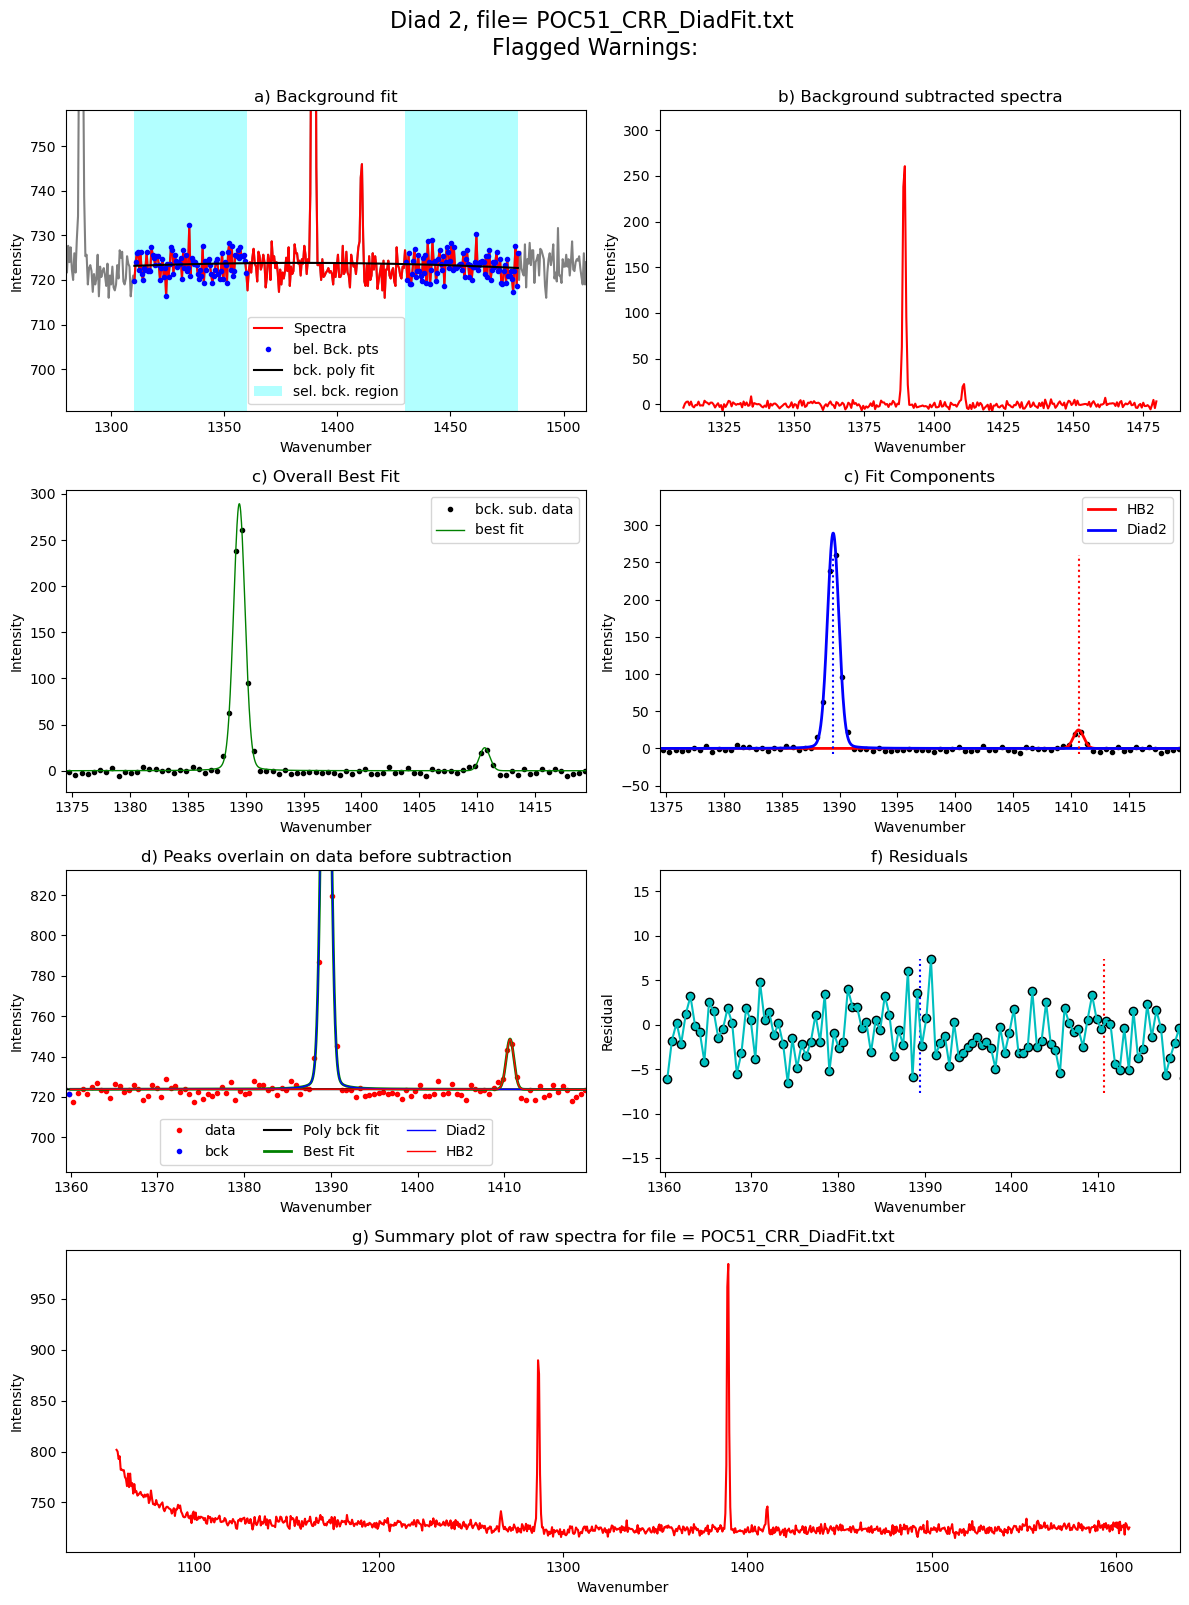

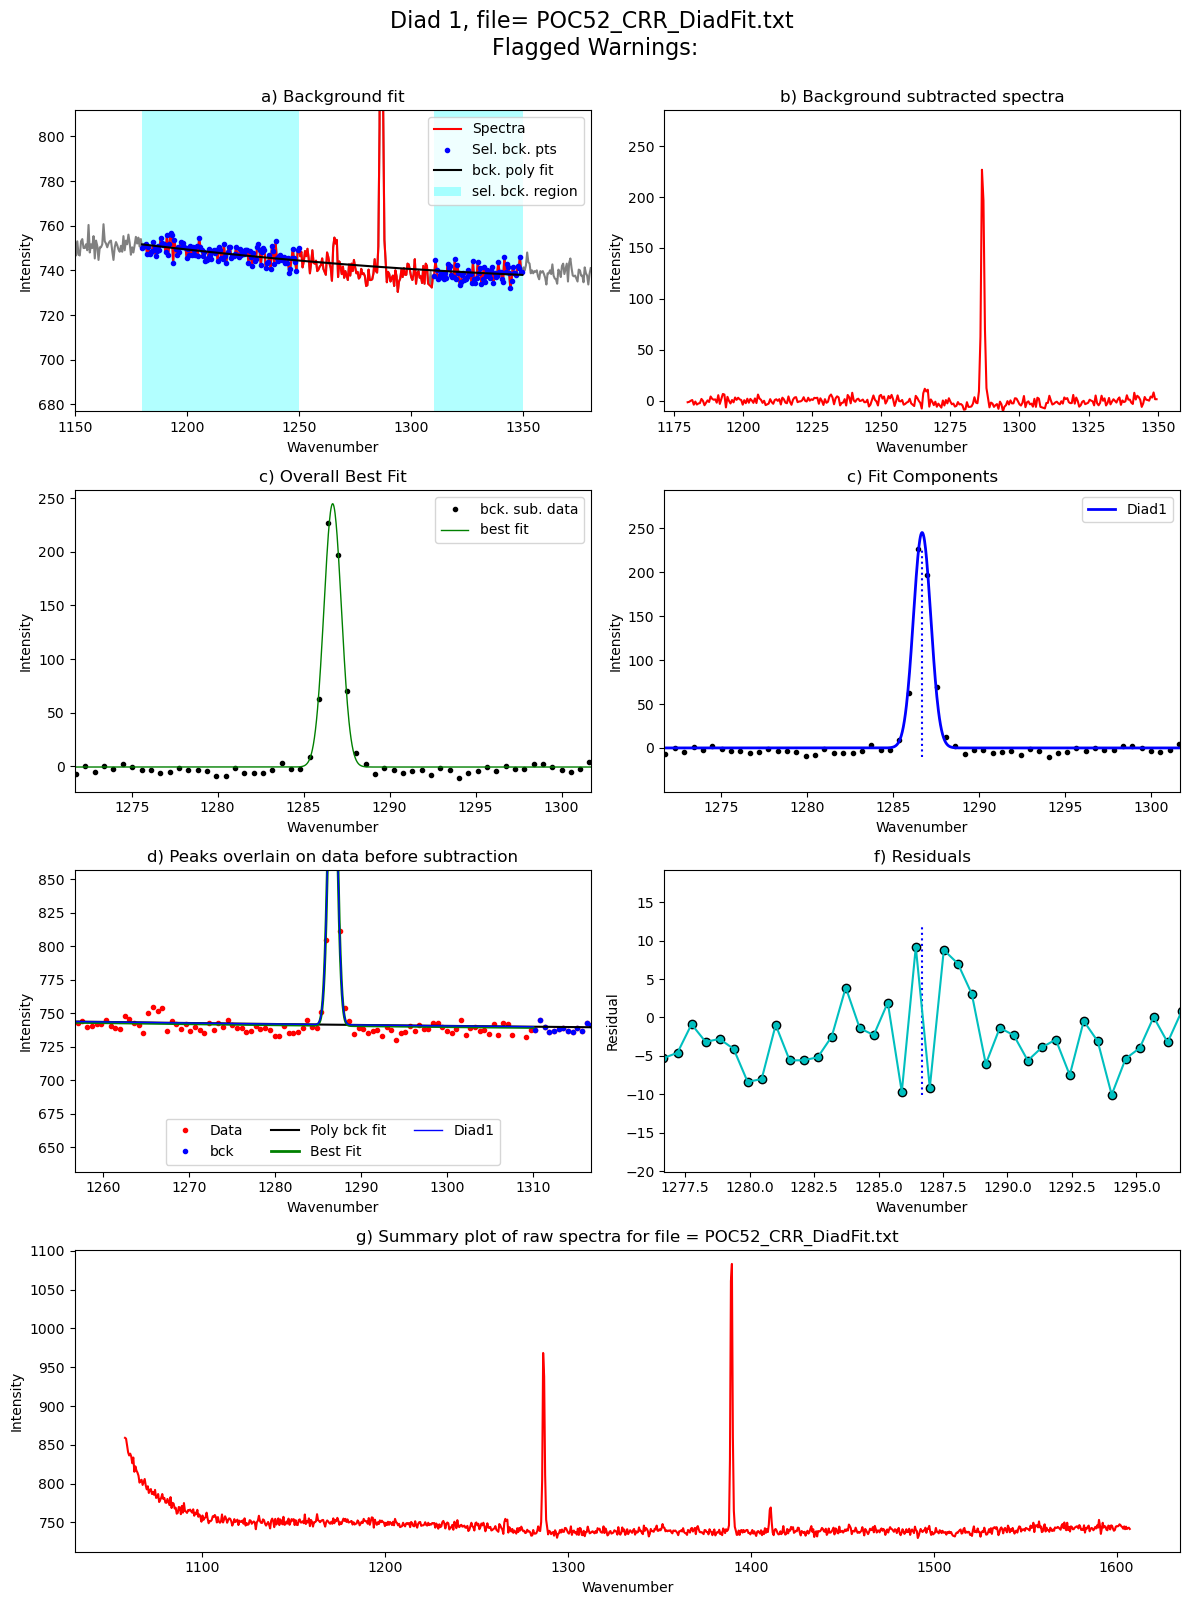

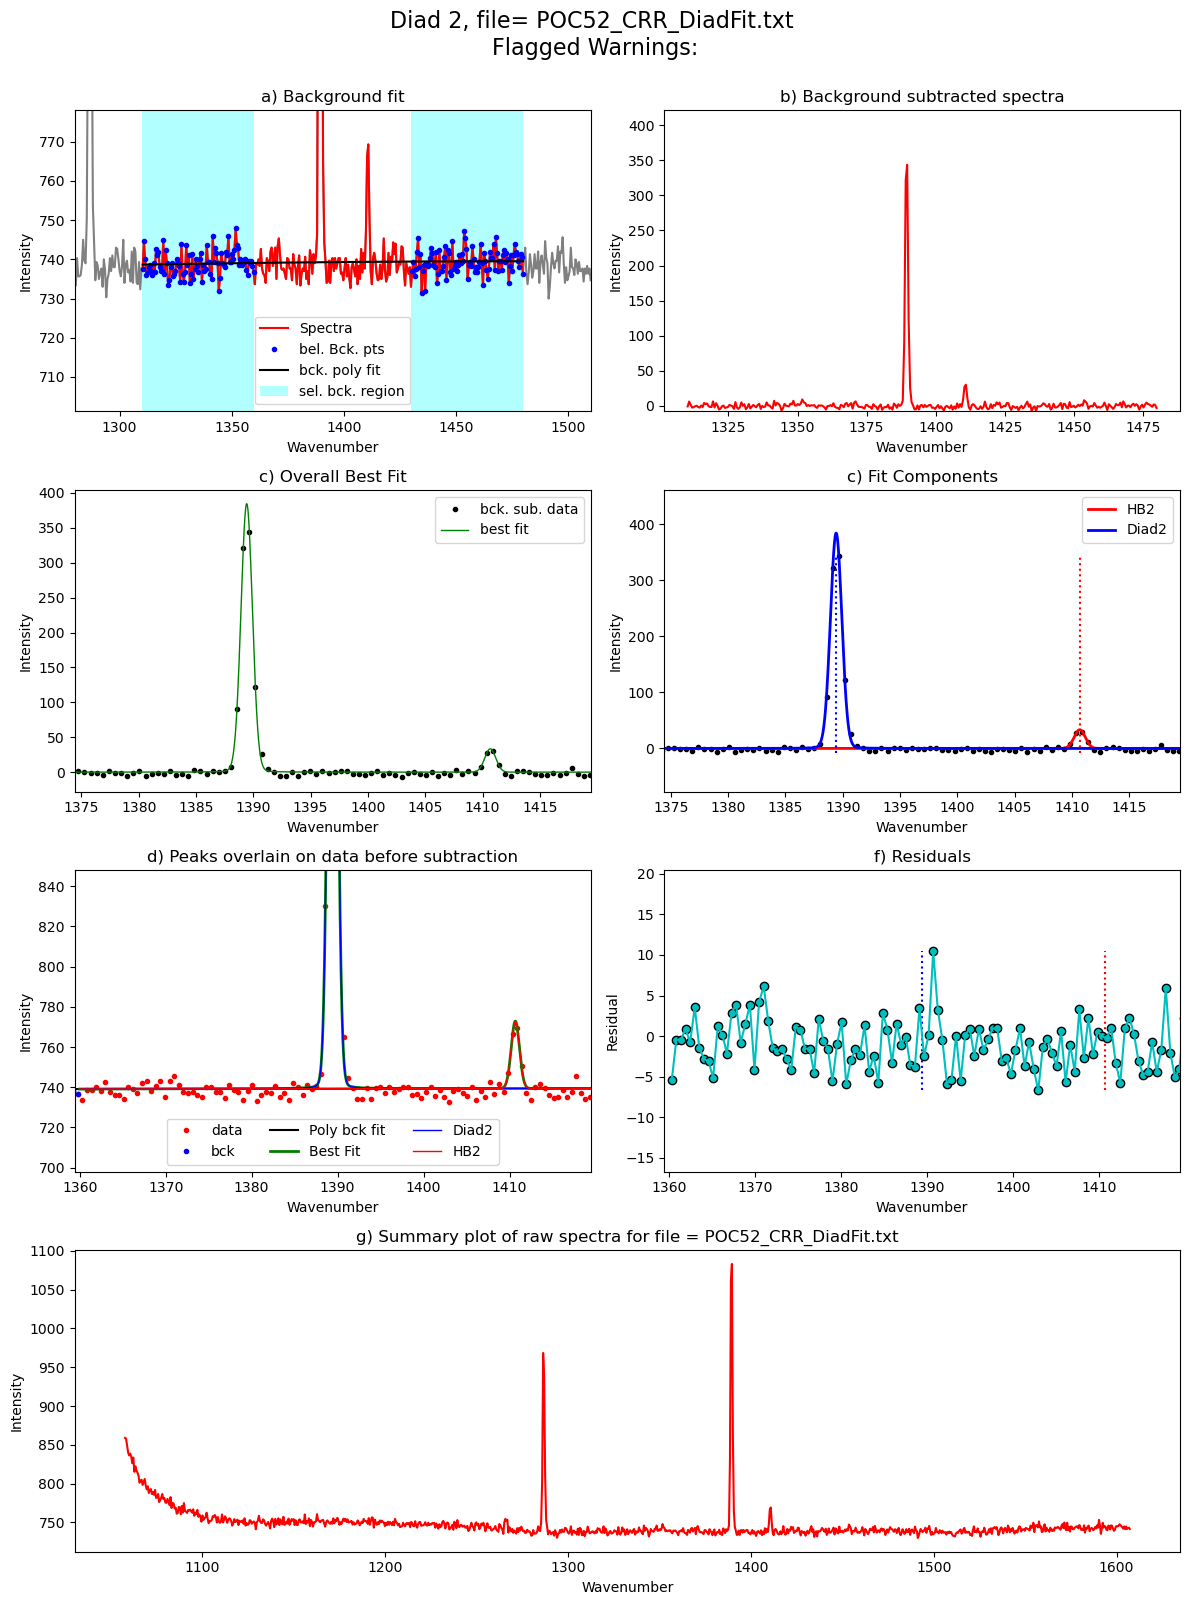

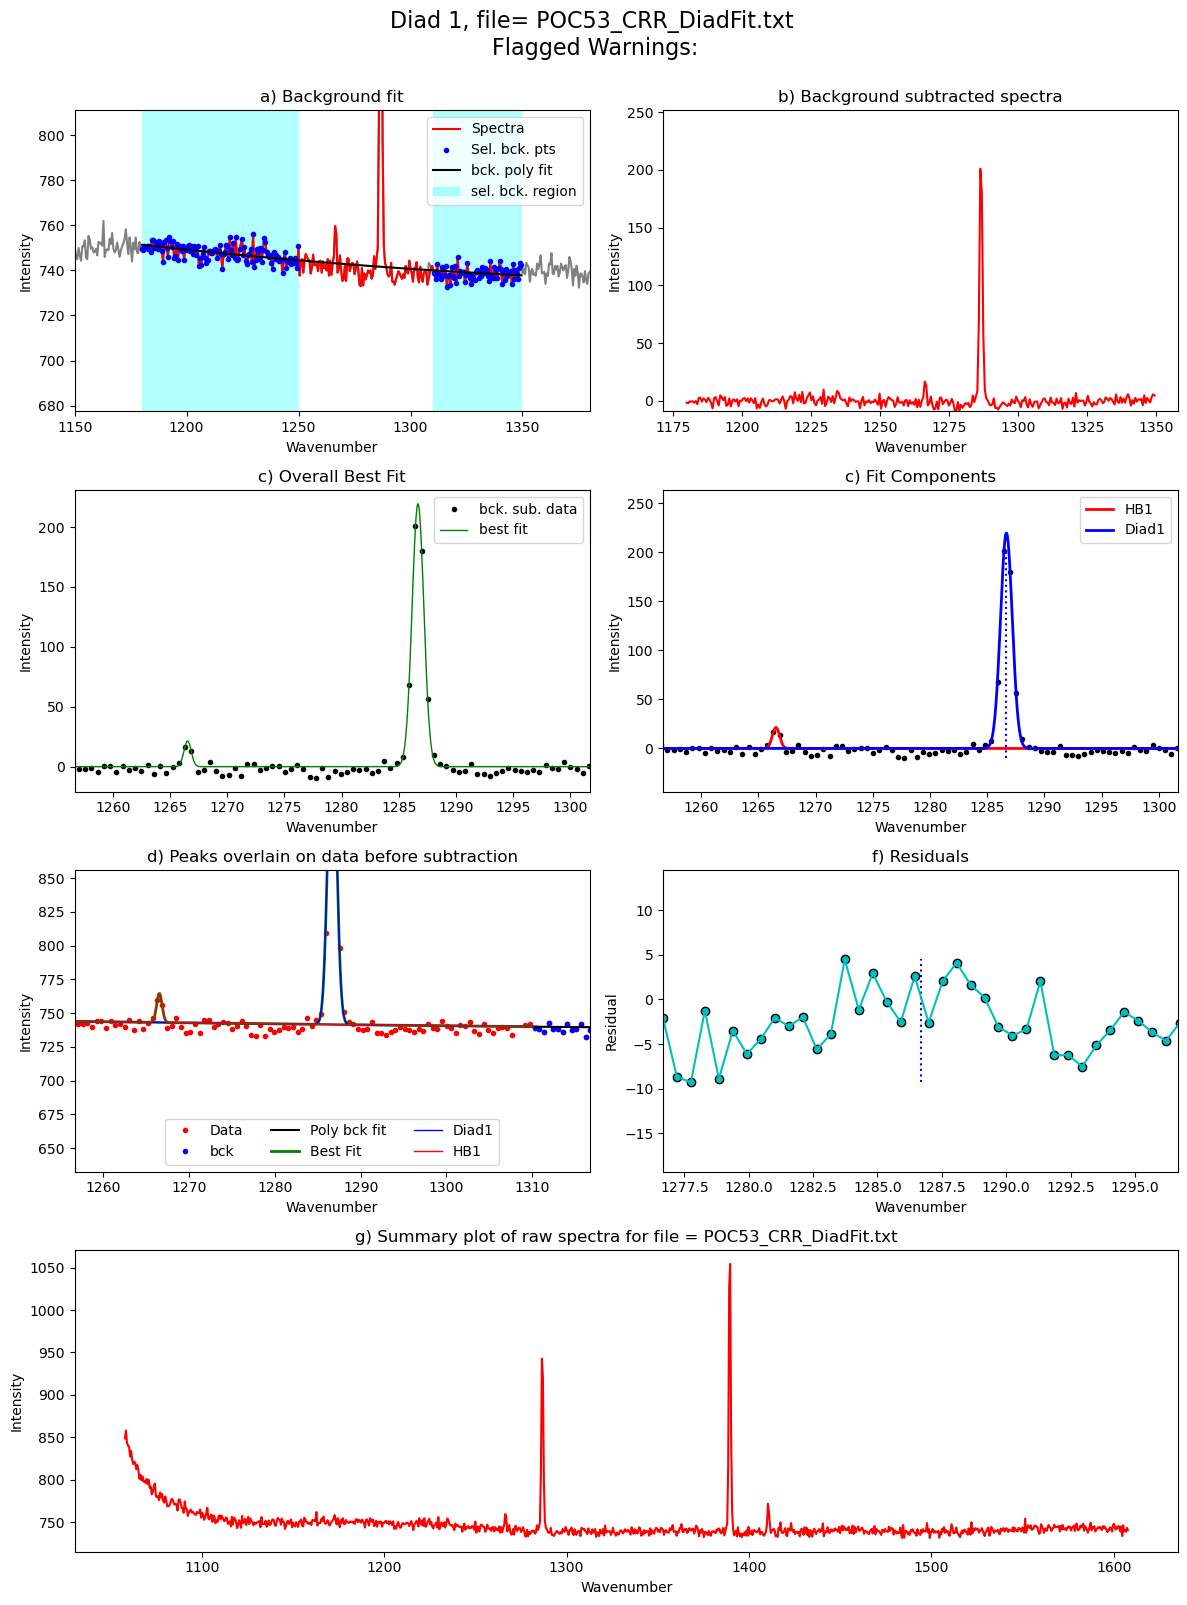

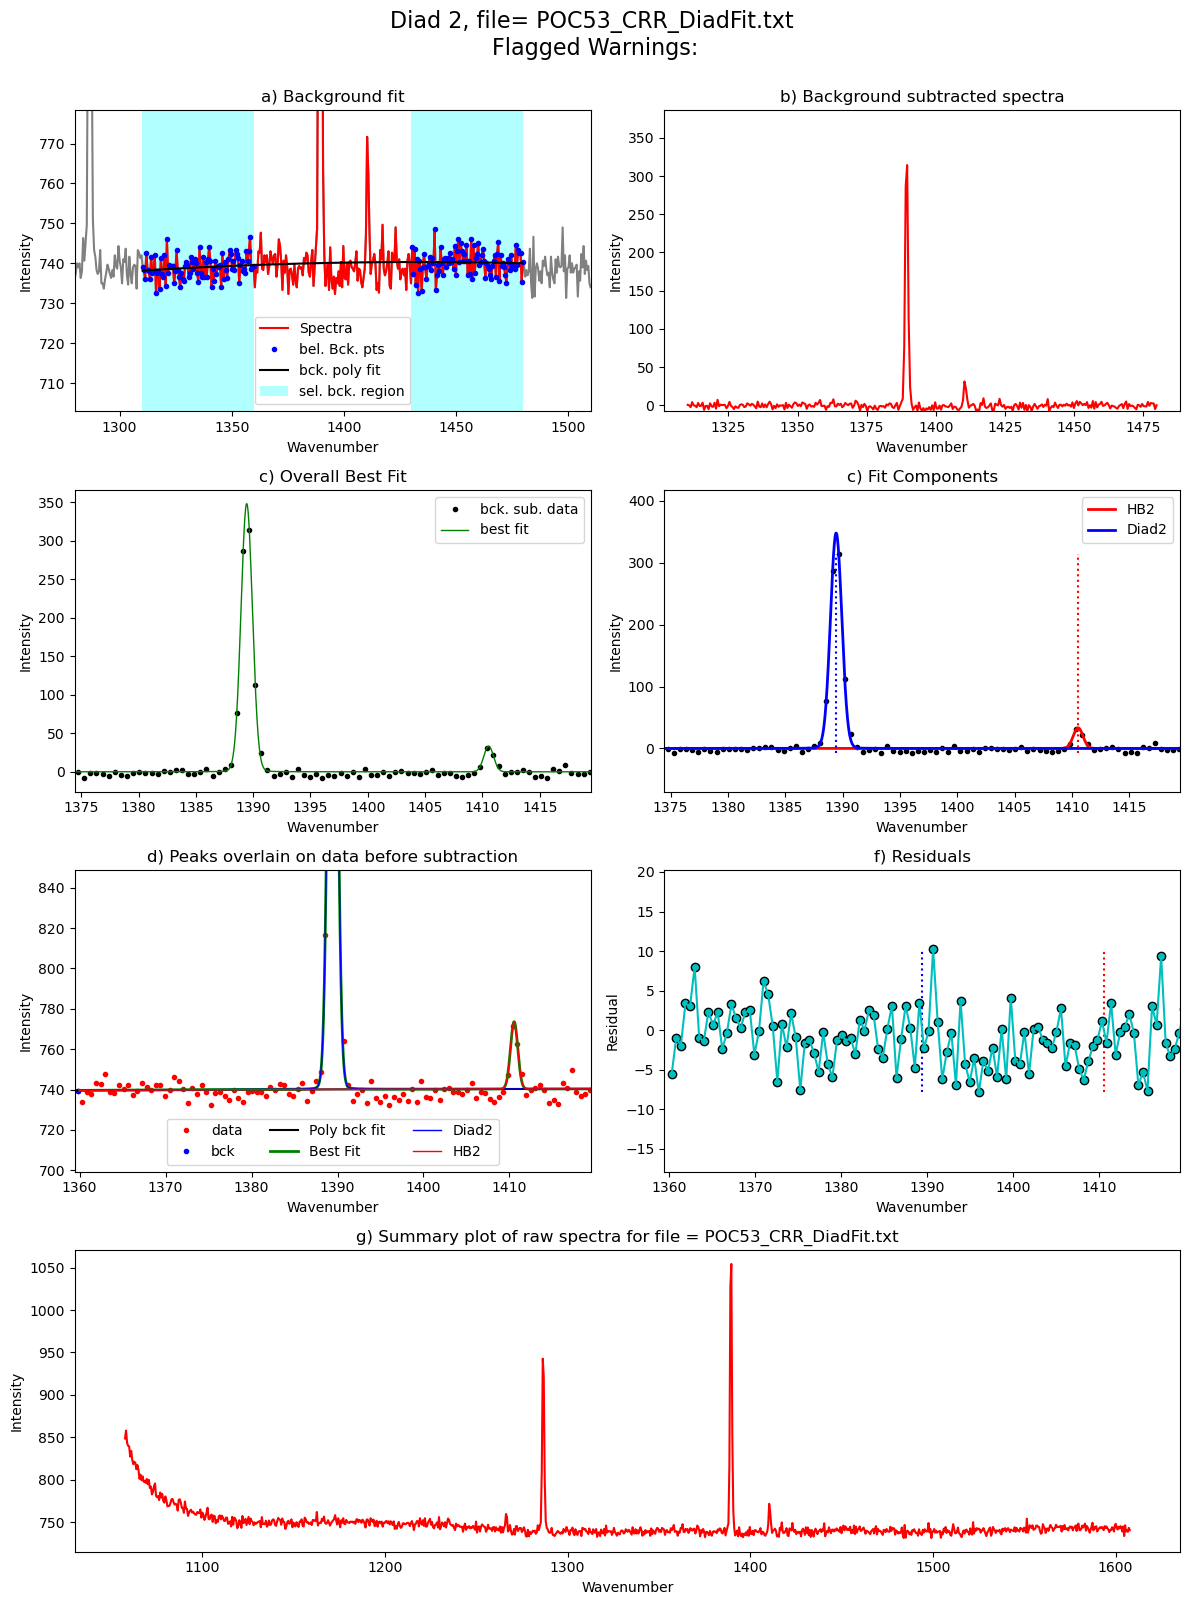

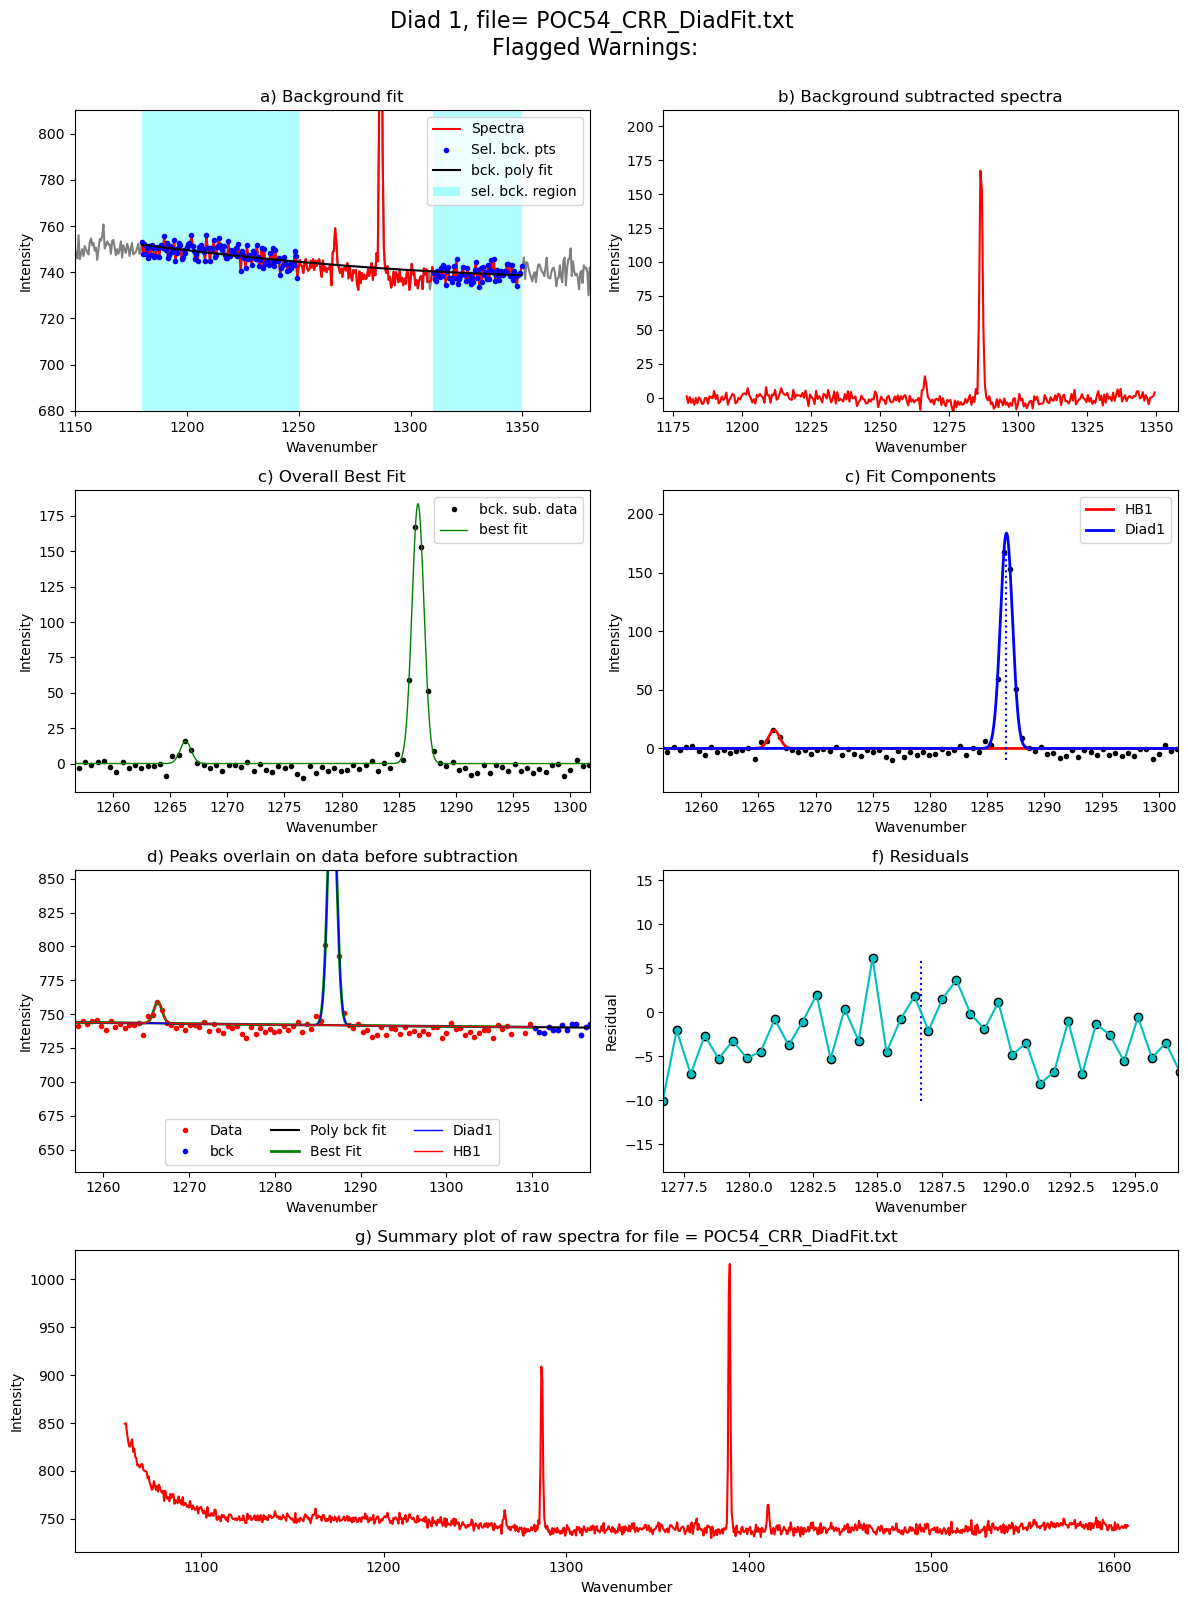

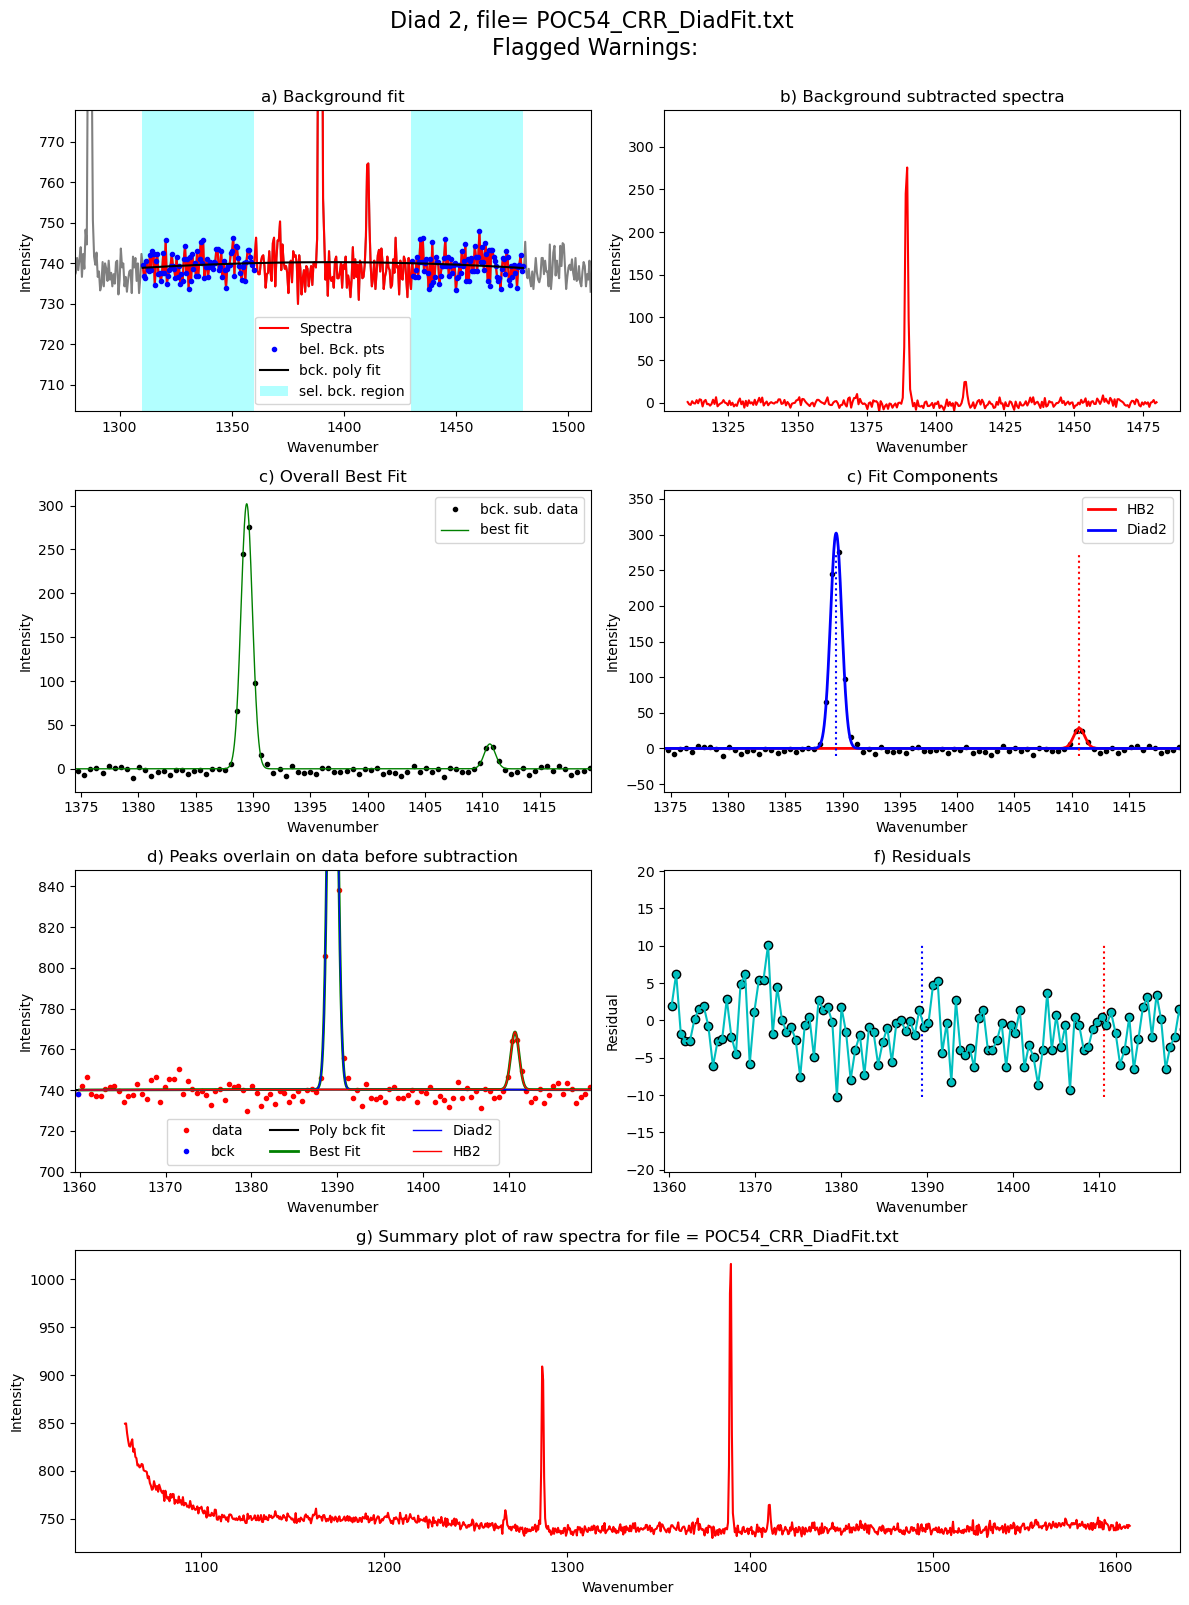

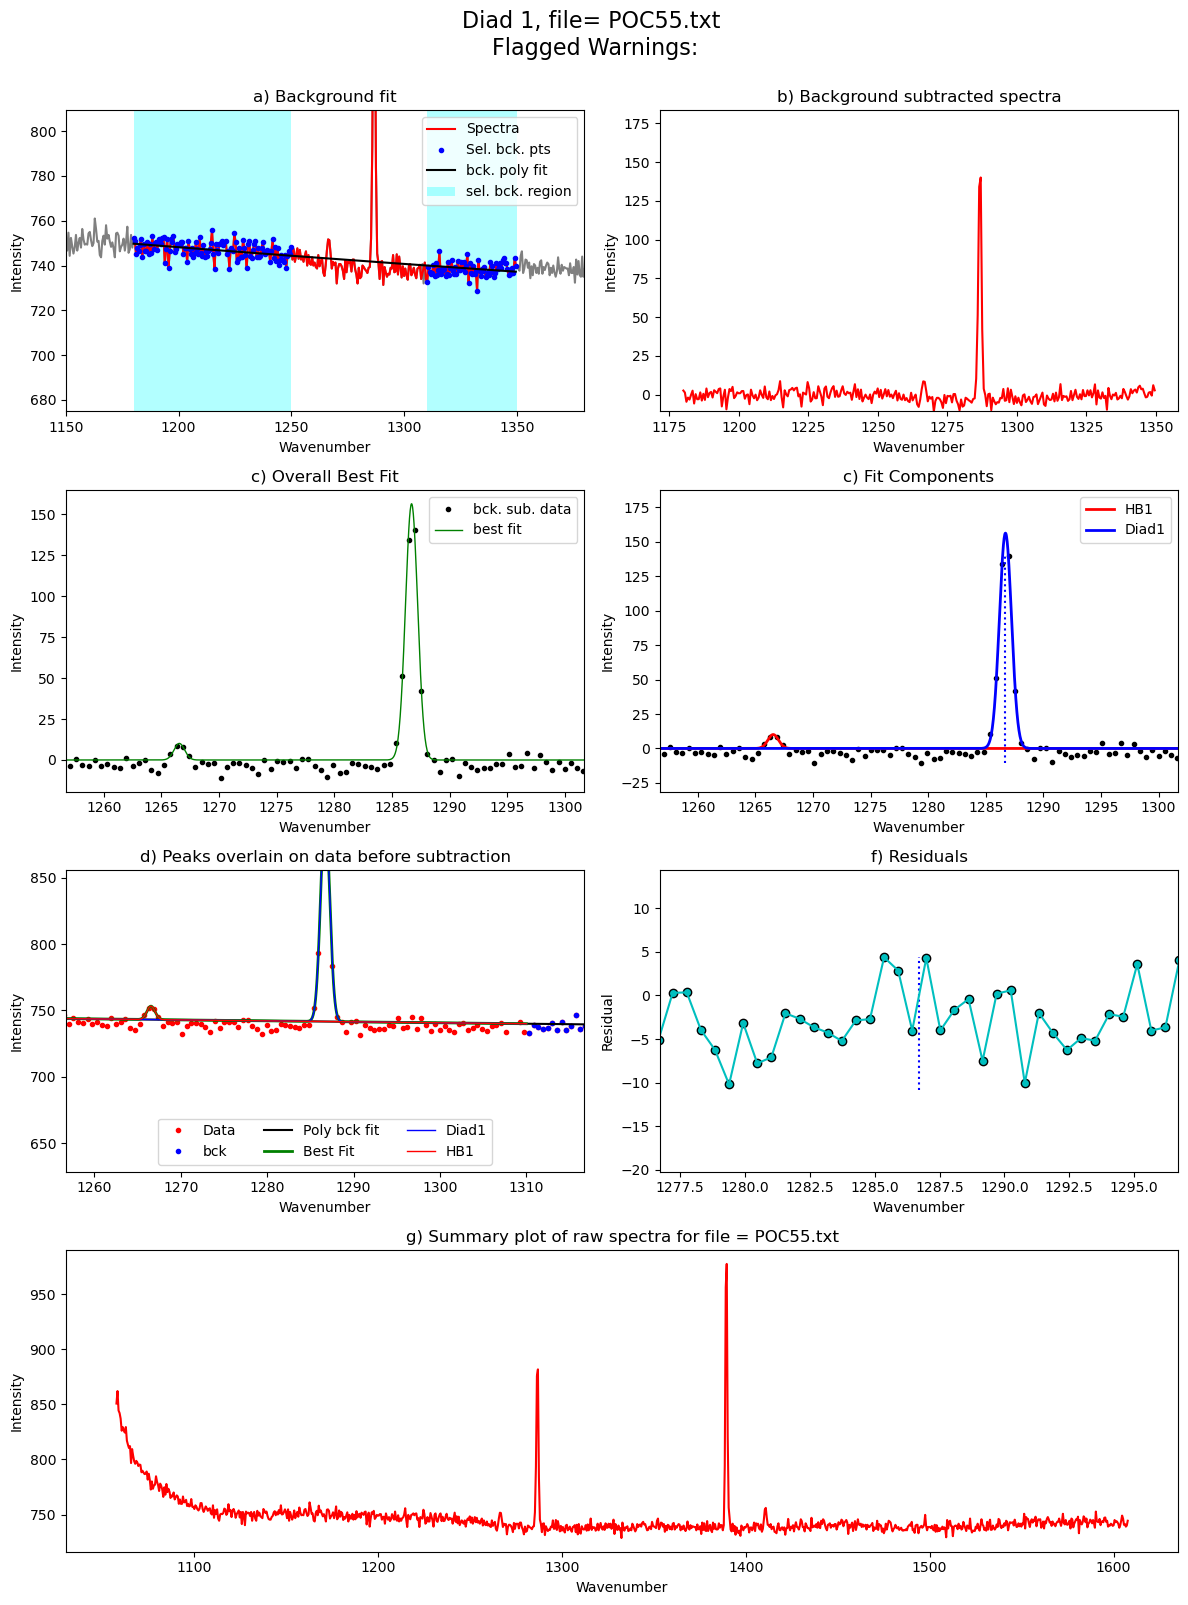

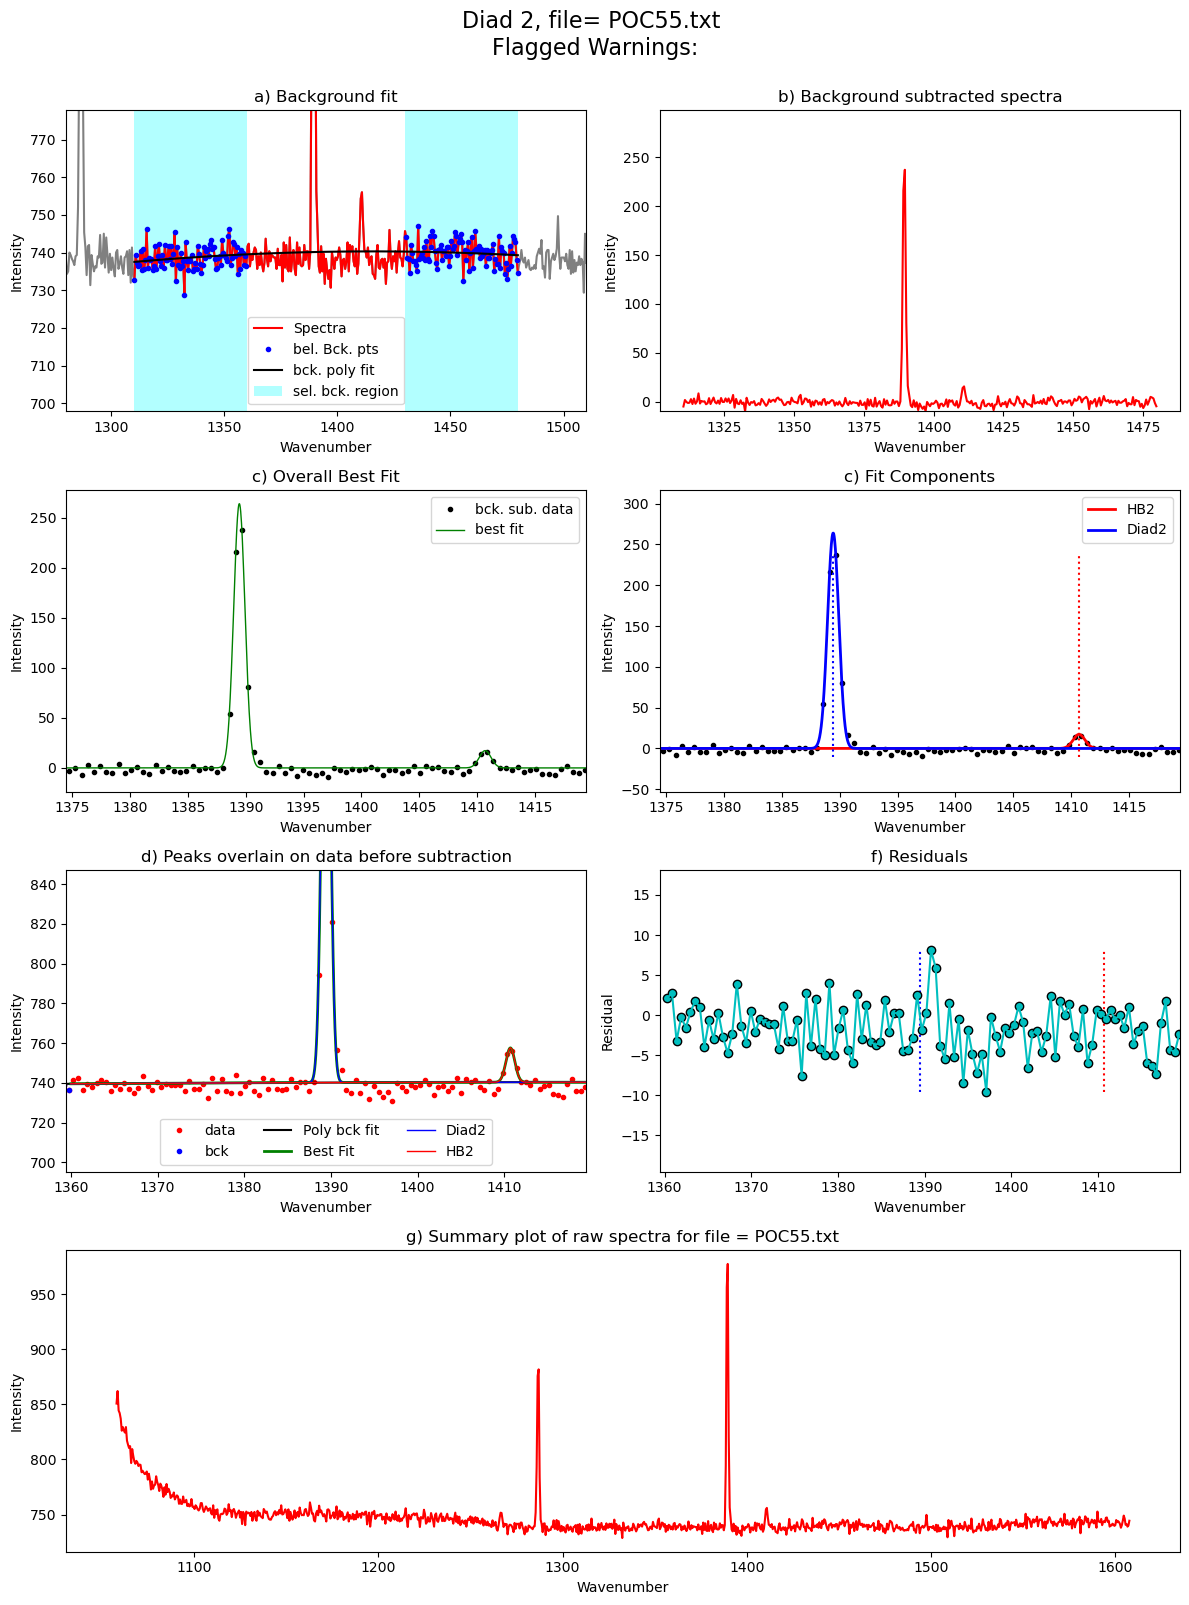

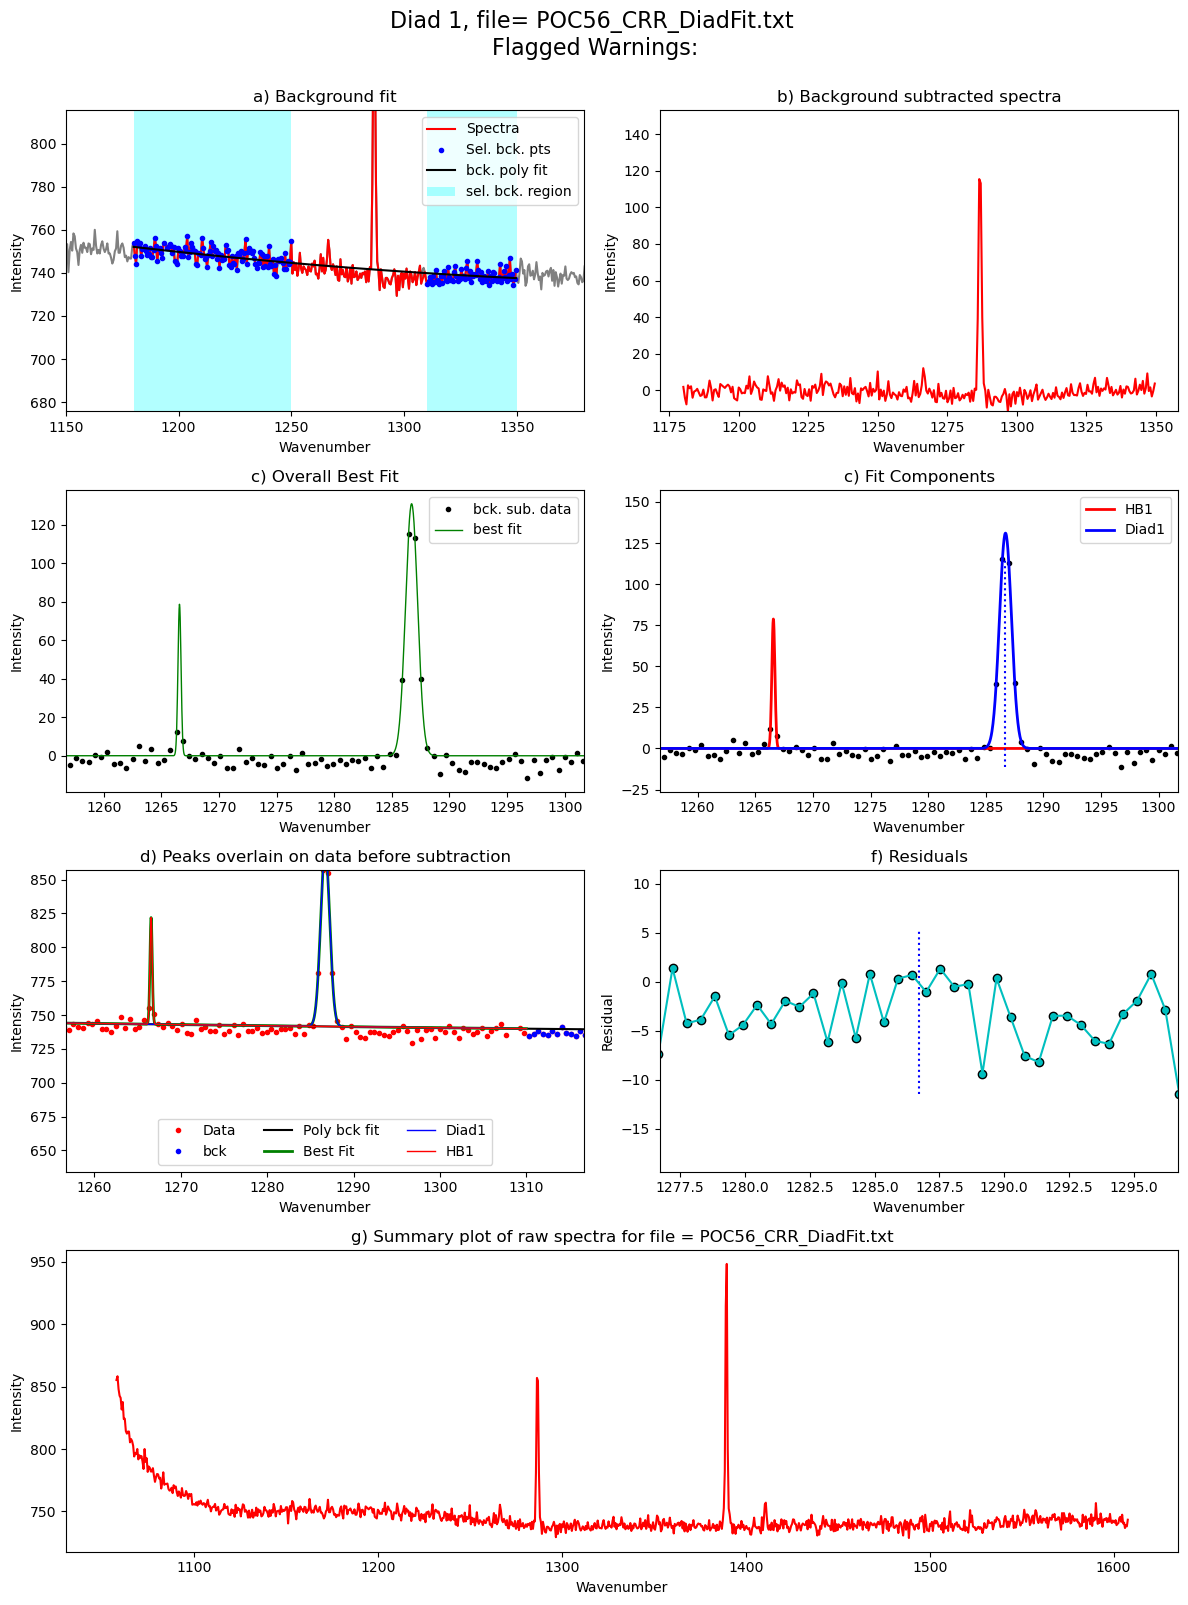

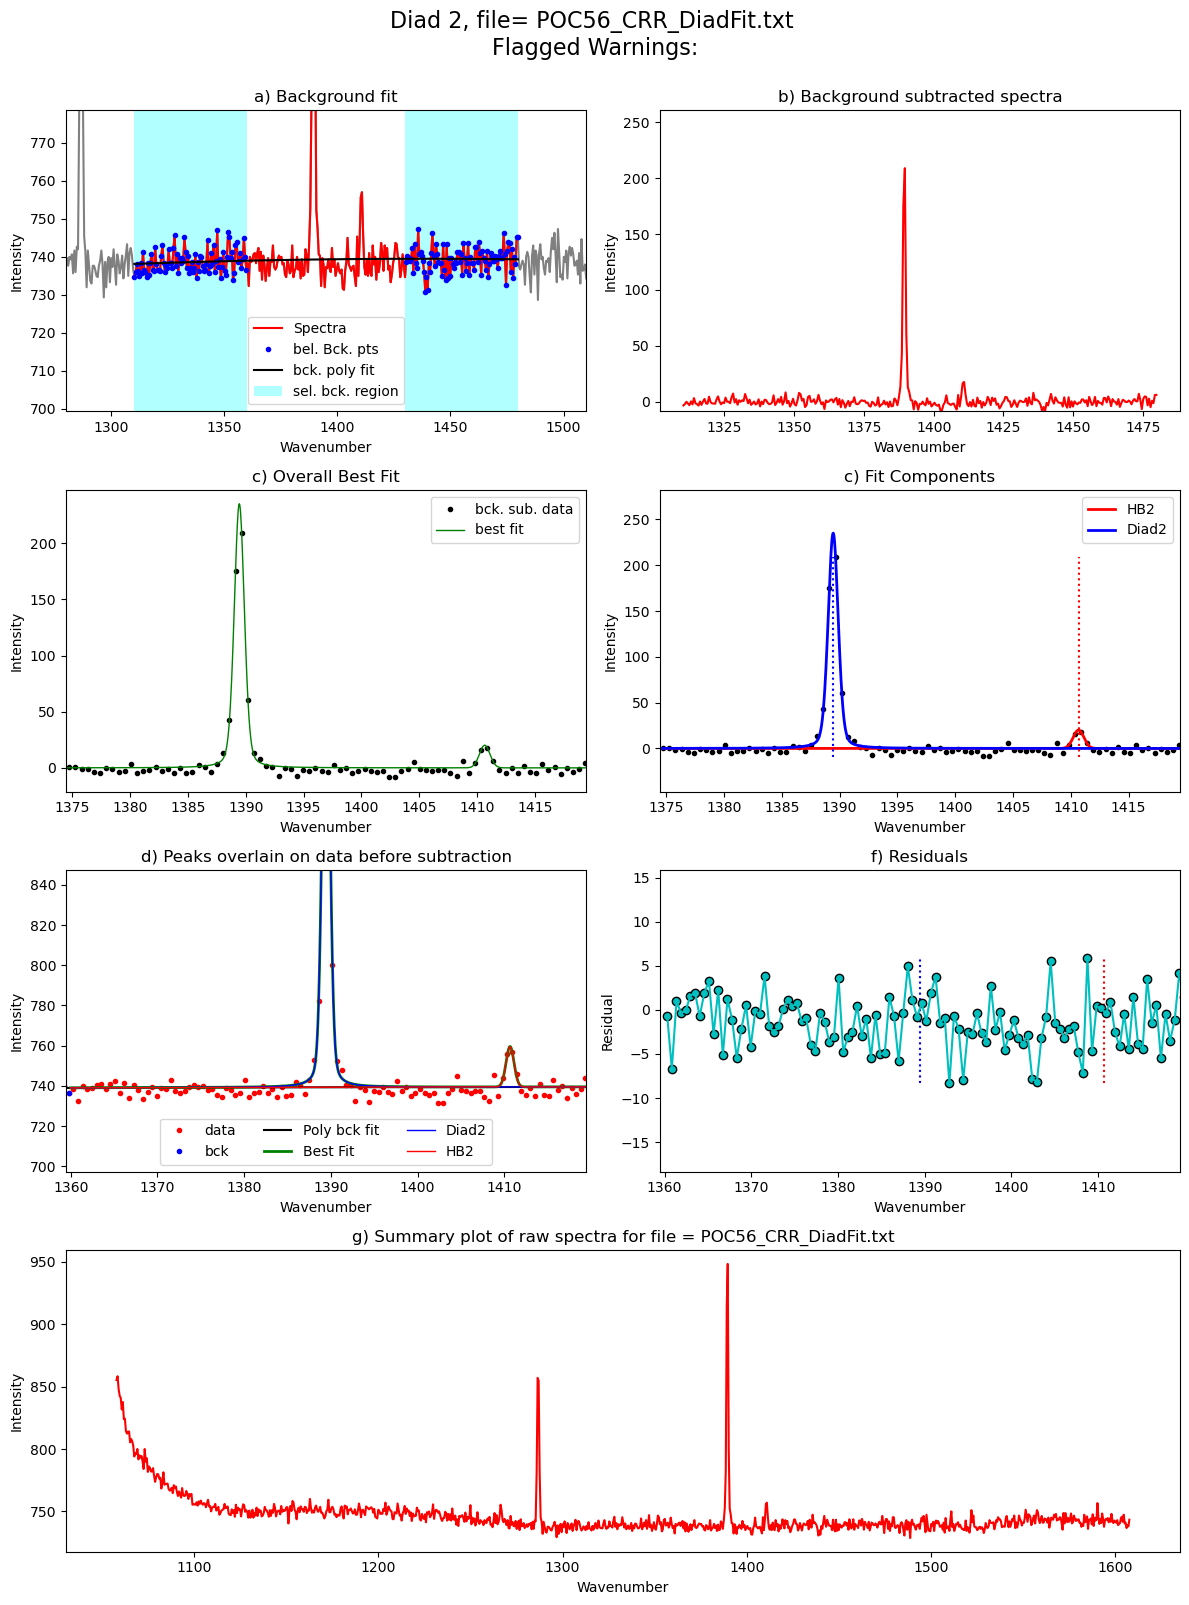

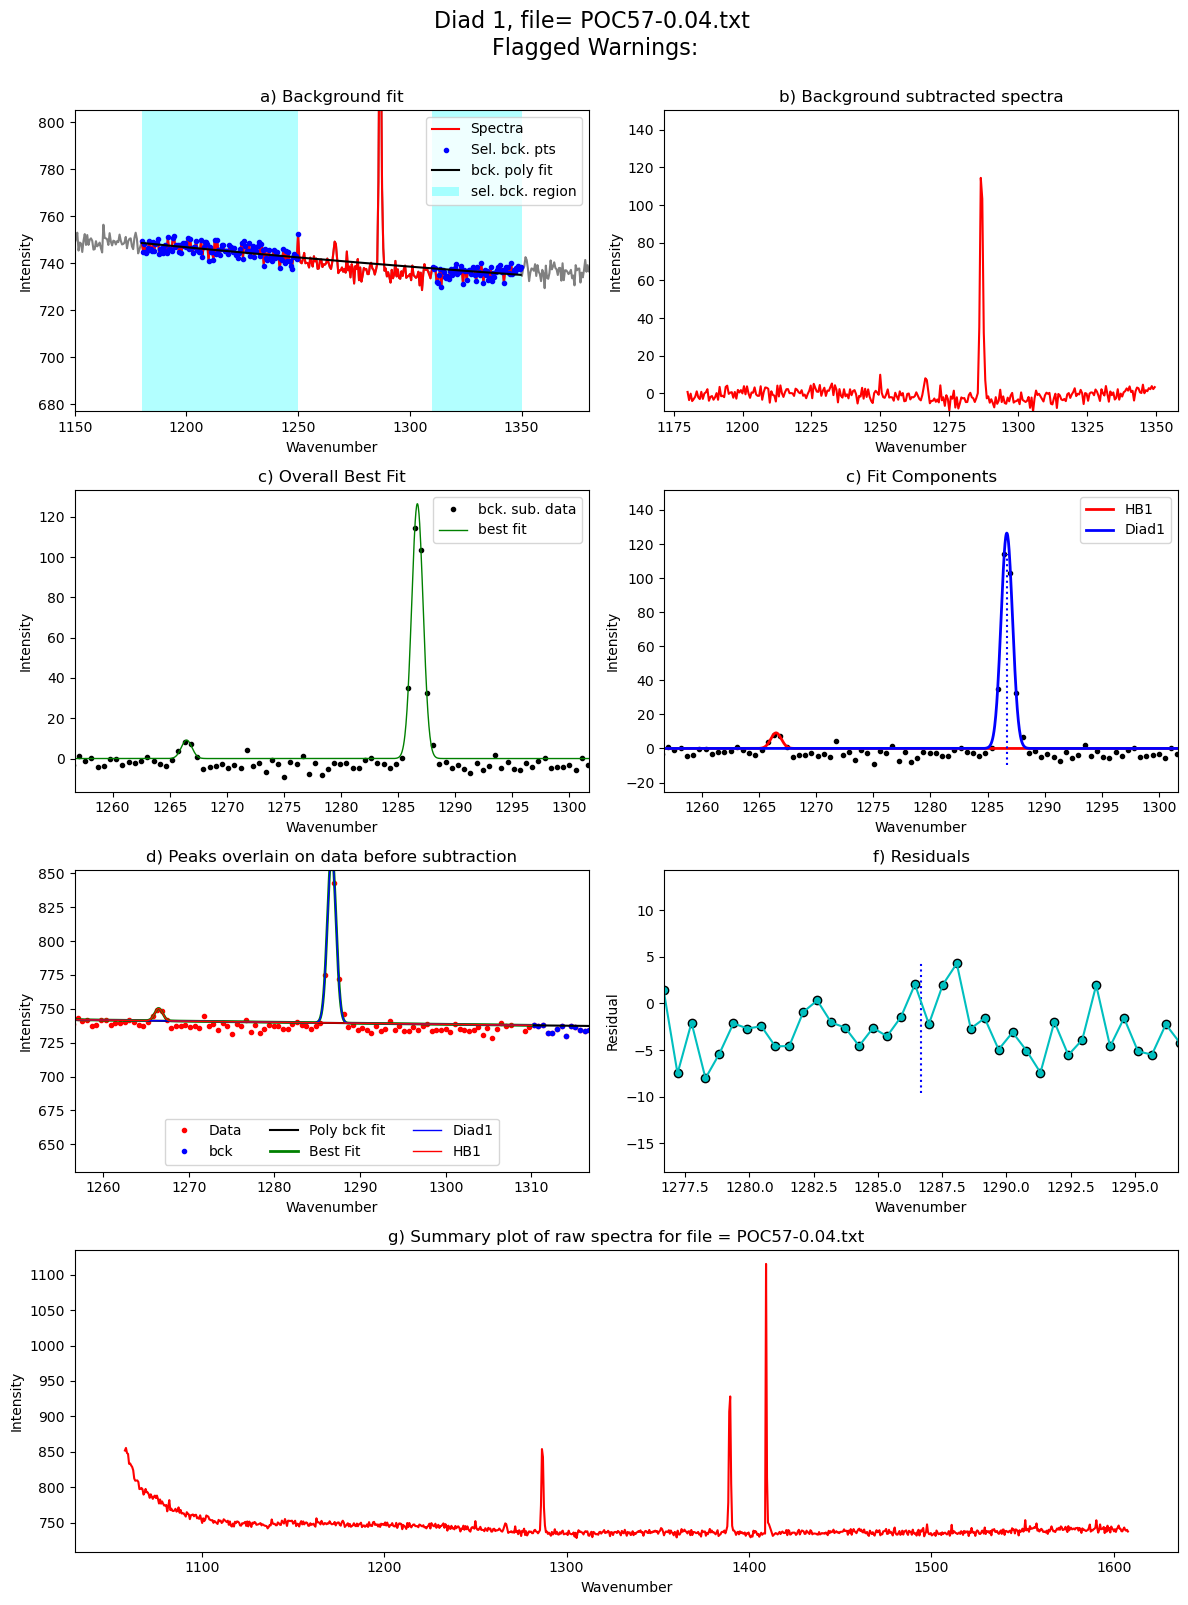

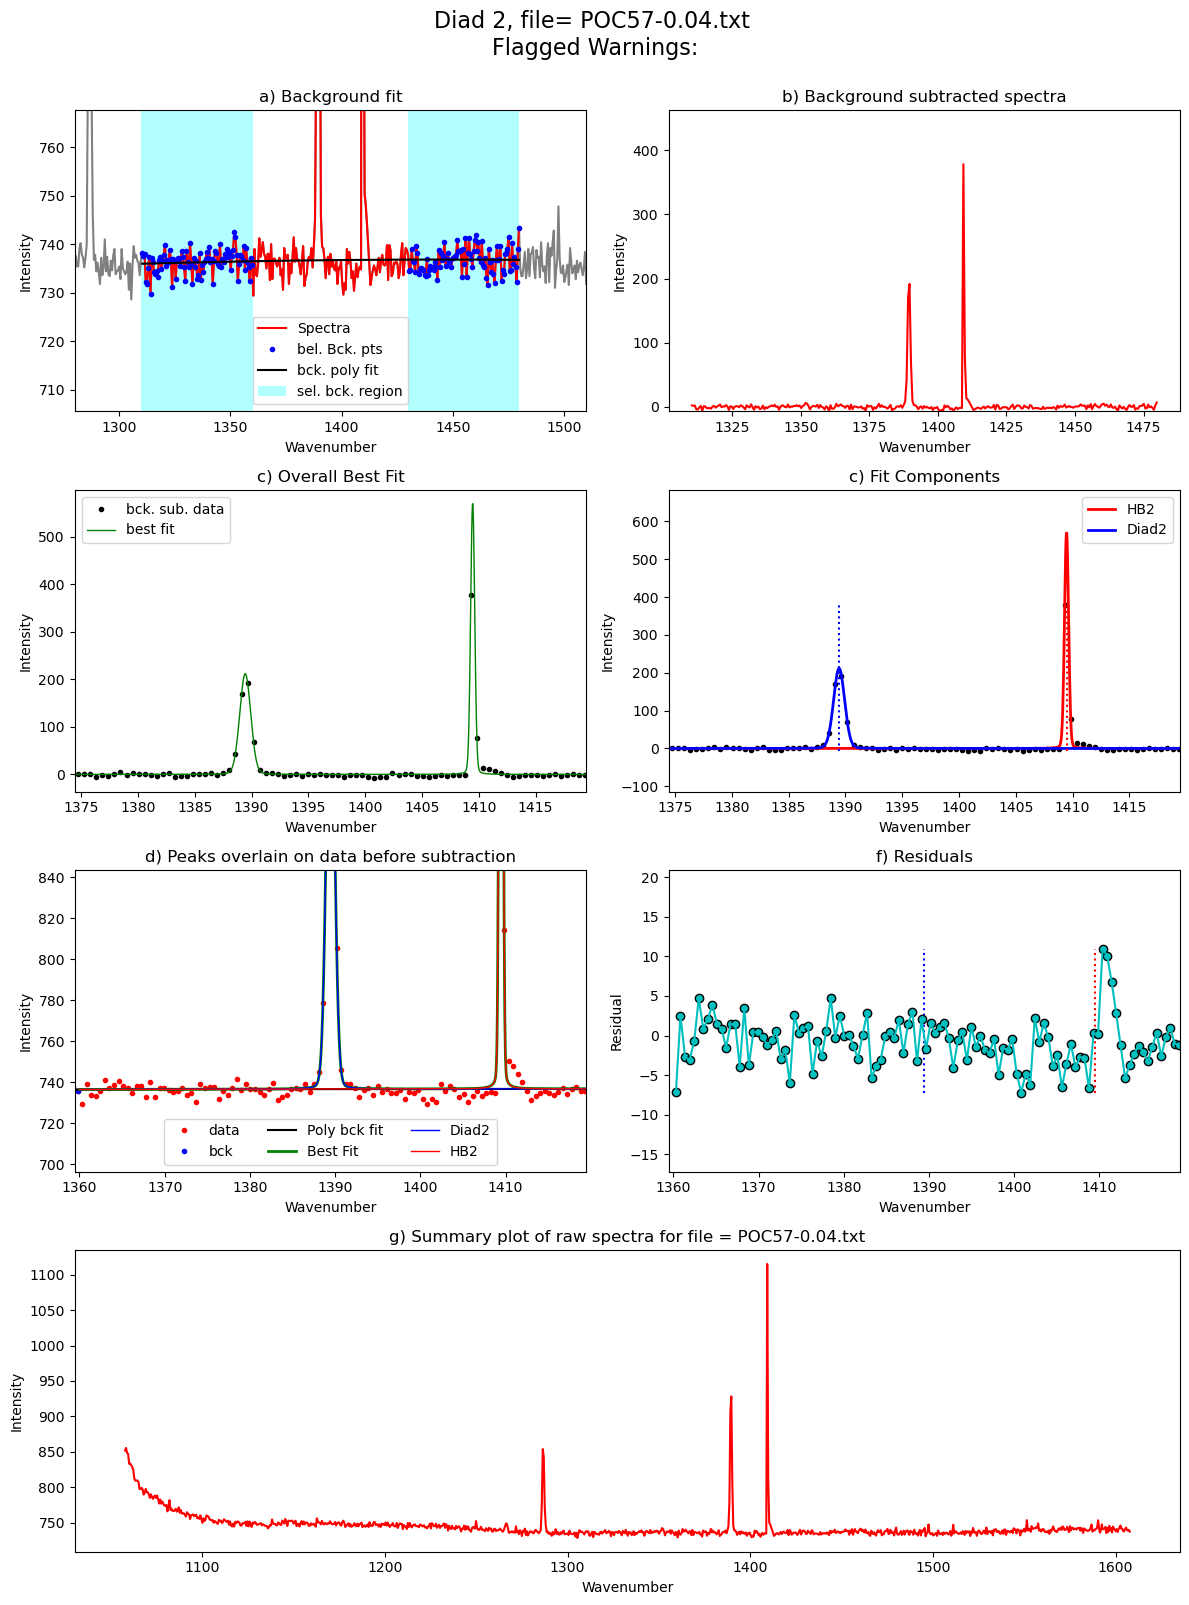

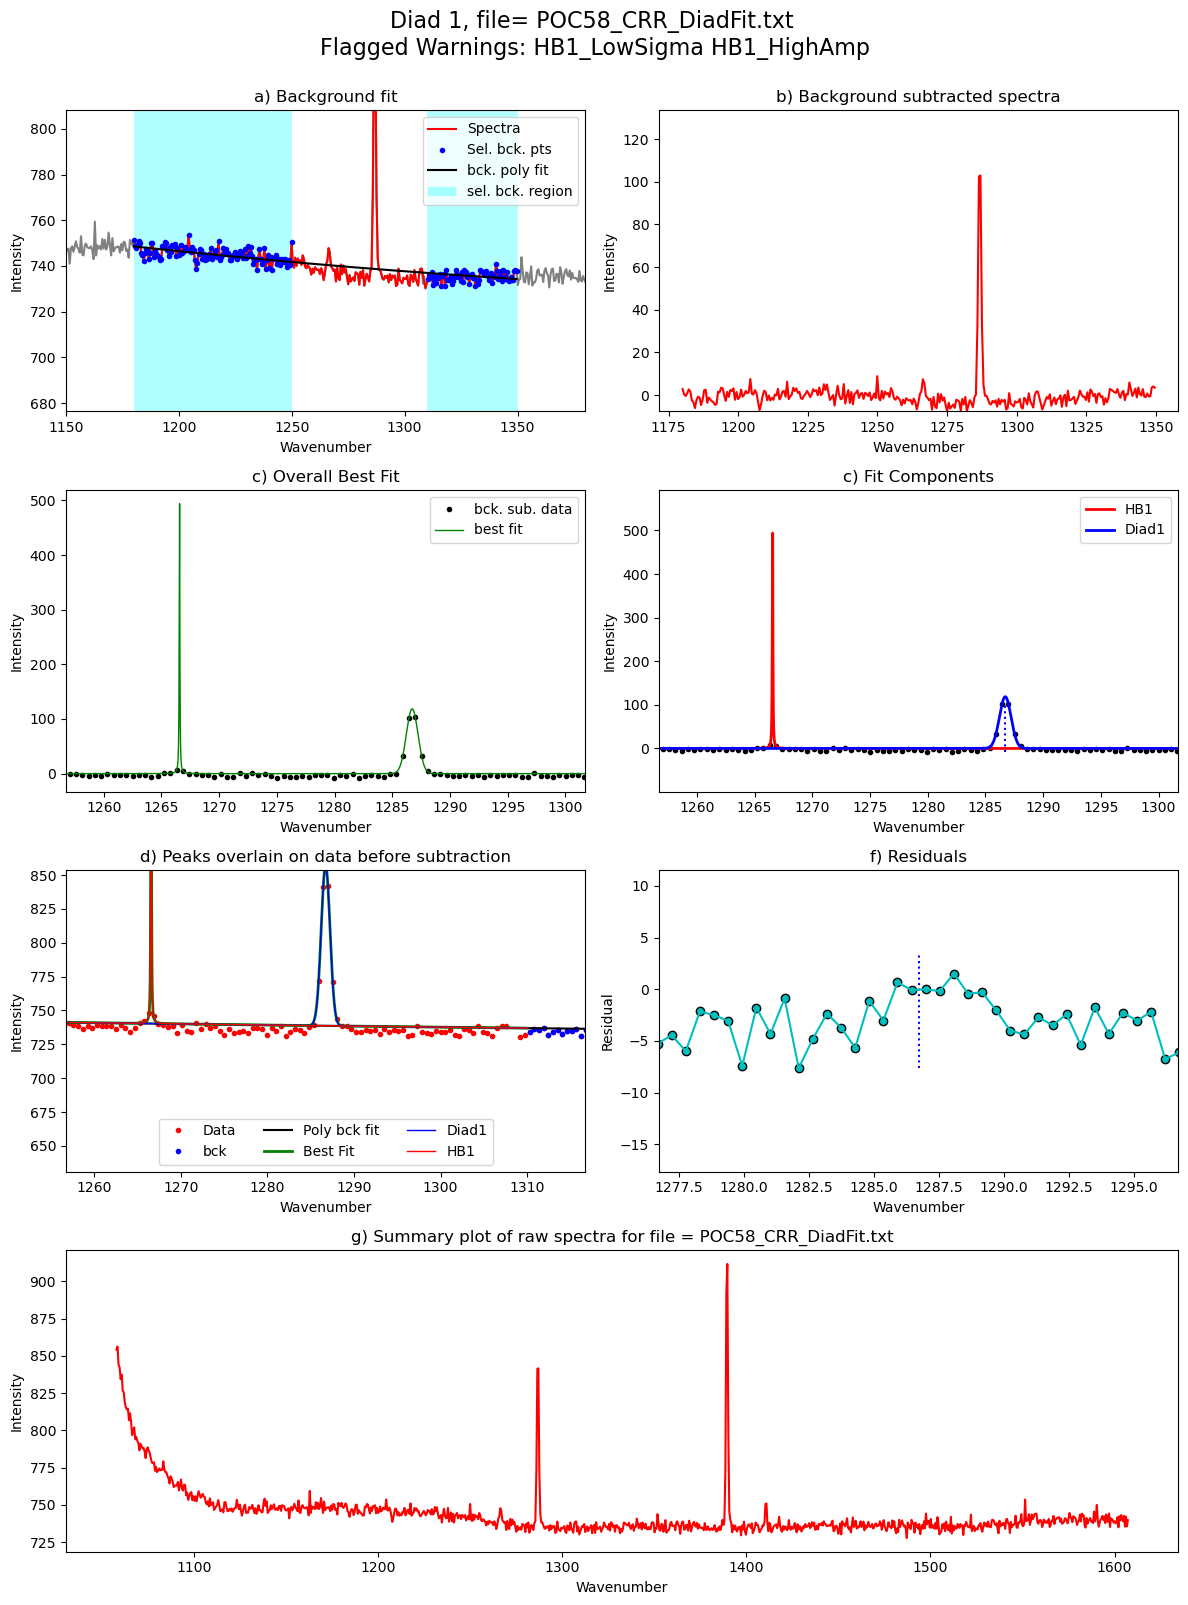

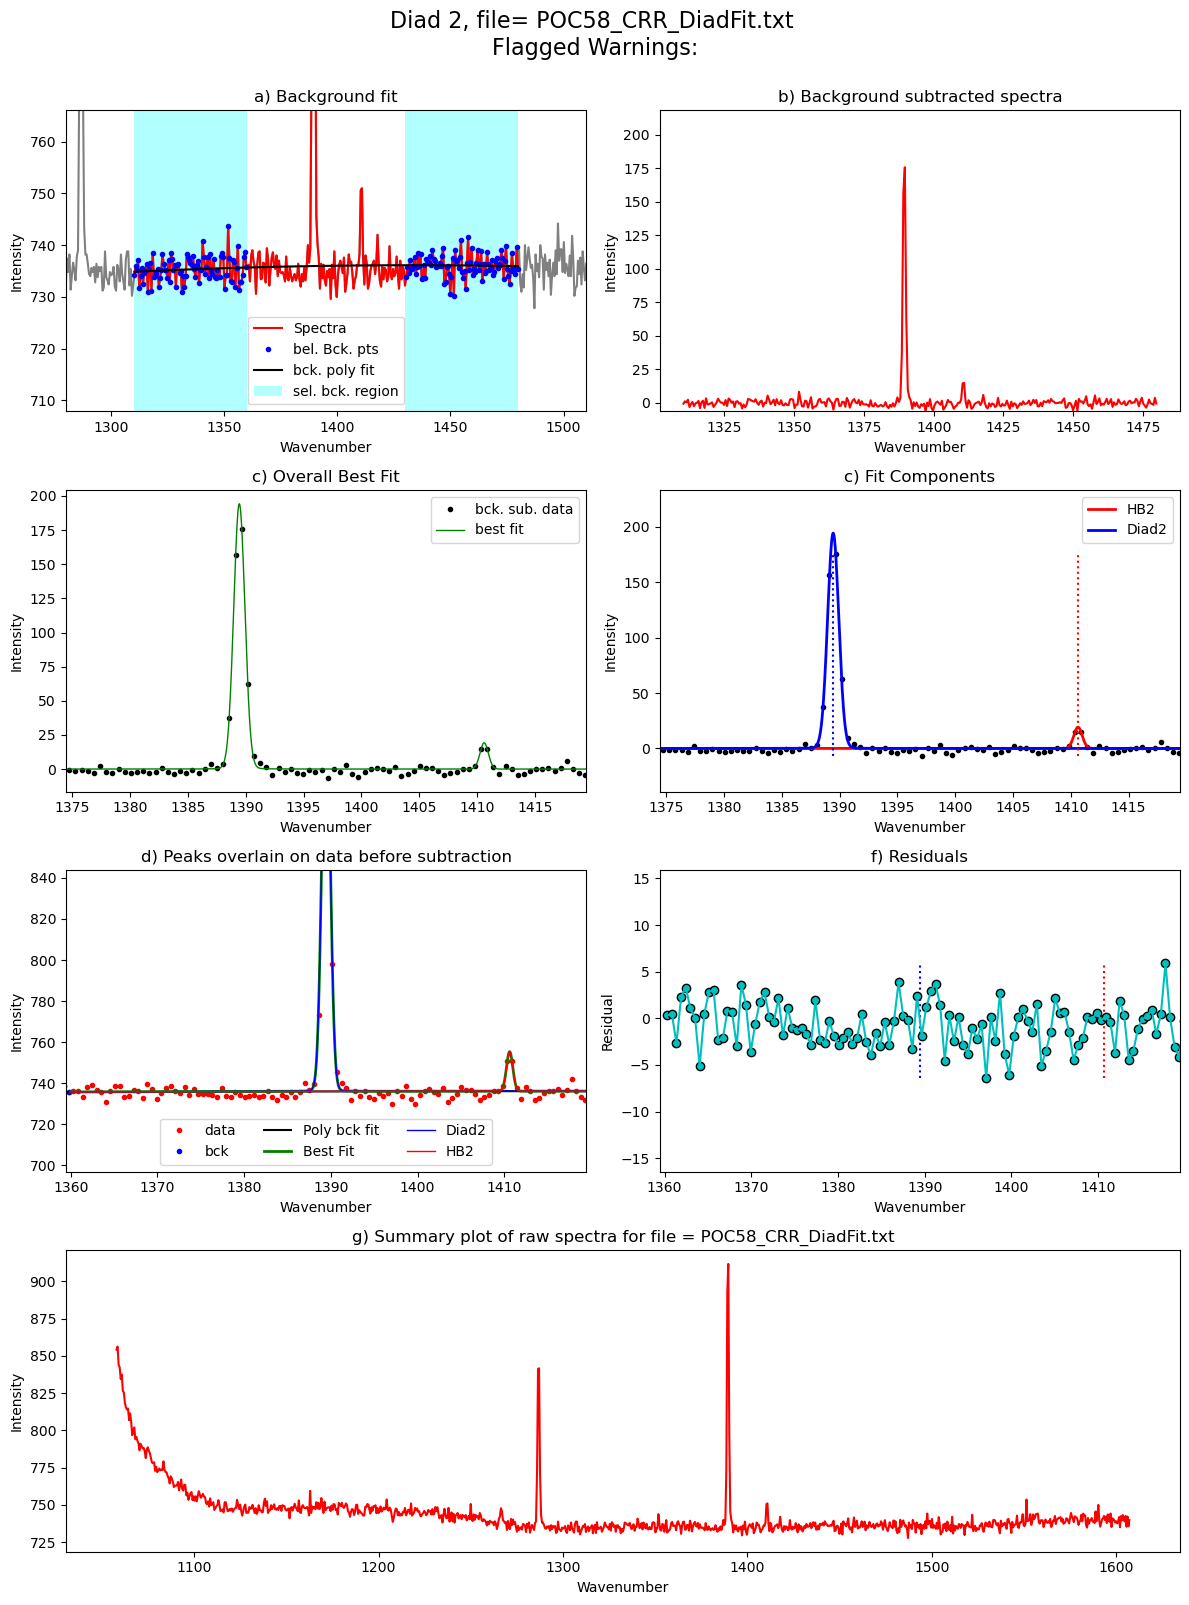

In [ ]:
from tqdm import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config2.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config2.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config2,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0)

### Get file names that flagged a warning

In [ ]:
refit_d1=(df_Merge['Diad1_refit']!='Flagged Warnings:')
refit_d2=(df_Merge['Diad2_refit']!='Flagged Warnings:')# (df_Merge['Diad2_refit']==True)
refit=refit_d1|refit_d2
print(sum(refit))
refit_names_1=df_Merge['filename'].loc[refit]
print(refit_names_1)

1
0    POC58_CRR_DiadFit
Name: filename, dtype: object


### Have a look at different parameters
- This can help you spot really bad fits

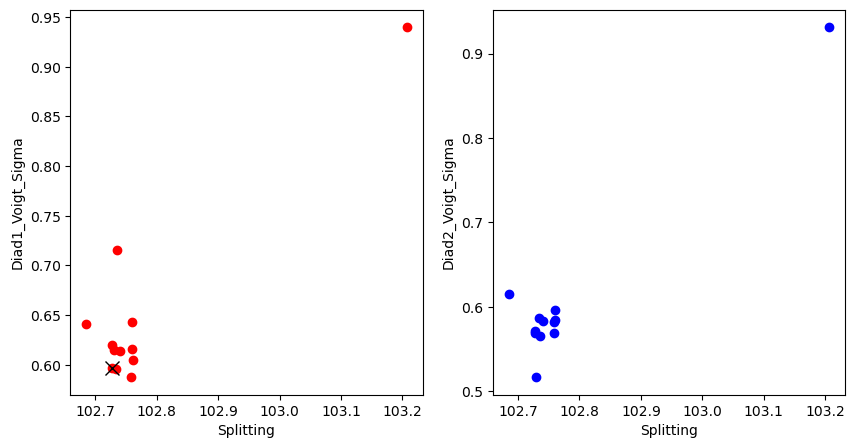

In [ ]:
x='Splitting'
y1='Diad1_Voigt_Sigma'
y2='Diad2_Voigt_Sigma'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x], df_Merge[y1], 'or')
ax2.plot(df_Merge[x], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

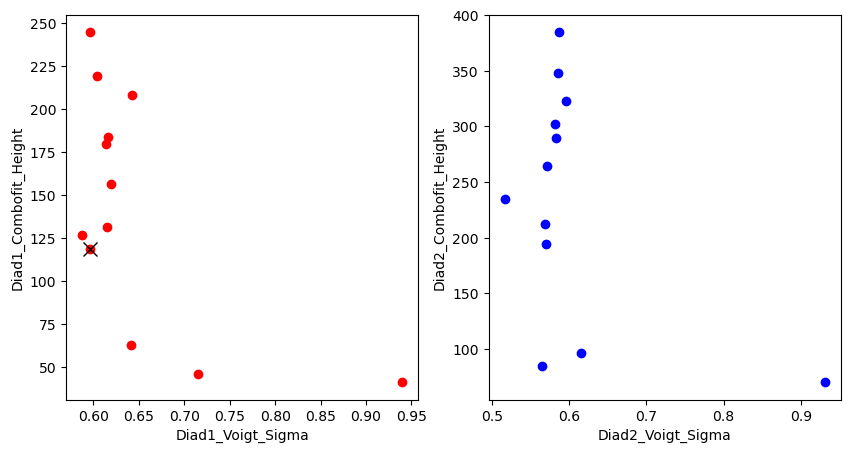

In [ ]:
x1='Diad1_Voigt_Sigma'
x2='Diad2_Voigt_Sigma'
y1='Diad1_Combofit_Height'
y2='Diad2_Combofit_Height'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x1], df_Merge[y1], 'or')
ax2.plot(df_Merge[x2], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x1].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x2].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)

ax1.set_xlabel(x1)
ax1.set_ylabel(y1)
ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

In [ ]:
## Save parameters to excel

In [ ]:
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx')
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx')
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx')

In [ ]:
combo

filename   Splitting  Split_err_abs  Split_err_quadrature  \
0  Cap19-05X2_CRR_DiadFit  102.759512            NaN                   NaN   
0              Cap19-07X1  102.735557         0.0403              0.030098   
0  Cap19-07X2_CRR_DiadFit  102.685627            NaN                   NaN   
0              FG04_31_MI  103.206811         0.0466              0.034286   
0       POC51_CRR_DiadFit  102.740281            NaN                   NaN   
0       POC52_CRR_DiadFit  102.734250            NaN                   NaN   
0       POC53_CRR_DiadFit  102.760788            NaN                   NaN   
0       POC54_CRR_DiadFit  102.759339            NaN                   NaN   
0                   POC55  102.727435            NaN                   NaN   
0       POC56_CRR_DiadFit  102.729805            NaN                   NaN   
0              POC57-0.04  102.758663            NaN                   NaN   
0       POC58_CRR_DiadFit  102.727846            NaN                   NaN   

   Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0          1286.620737             NaN             207.881739   
0          1286.700137          0.0270              45.642815   
0          1286.704098             NaN              62.560986   
0          1285.207329          0.0300              40.964661   
0          1286.697274             NaN             179.754109   
0          1286.689829          0.0088             244.740616   
0          1286.675376             NaN             219.447448   
0          1286.683841             NaN             183.616453   
0          1286.707956             NaN             156.339798   
0          1286.713956             NaN             131.045036   
0          1286.687399             NaN             126.454608   
0          1286.718132             NaN             118.641492   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  ...  HB2_Sigma  \
0       1286.620787        295.230007           0.642750  ...   0.615226   
0       1286.700137         69.634128           0.715355  ...        NaN   
0       1286.704148         85.410375           0.641328  ...   0.211807   
0       1285.207329        113.322977           0.939907  ...        NaN   
0       1286.697274        235.084330           0.614302  ...   0.523116   
0       1286.689829        311.318738           0.596054  ...   0.563253   
0       1286.675376        282.356989           0.604369  ...   0.497847   
0       1286.683841        240.609076           0.615514  ...   0.569007   
0       1286.707956        206.275458           0.619749  ...   0.602704   
0       1286.714006        171.473900           0.614632  ...   0.539676   
0       1286.687399        158.141900           0.587421  ...   0.211487   
0       1286.718182        150.650370           0.596452  ...   0.426743   

   C13_Cent  C13_Area C13_Sigma  Diad2_Gauss_Cent  Diad2_Gauss_Area  \
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   

   Diad2_Gauss_Sigma  Diad1_Gauss_Cent  Diad1_Gauss_Area  Diad1_Gauss_Sigma  
0                NaN               NaN               NaN                NaN  
0                NaN               NaN               NaN                NaN  
0        